In [68]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
S = 10
K = 10
B = 20
r = 0.05
sigma = 0.07
T = 1
t = 0
M = 100
N = 1000

In [70]:
def d1(dt, s):    
    return (1/(sigma * np.sqrt(dt)) *(np.log(s) + (r + 0.5 * sigma ** 2) * dt))
def d2(dt, s):
    return (1/(sigma * np.sqrt(dt)) *(np.log(s) + (r - 0.5 * sigma ** 2) * dt))
def up_and_out_call_V(t, x, B, sigma, r):    
    dt = T - t
    V = x * (norm.cdf(d1(dt, x/K)) - norm.cdf(d1(dt, x/B))) - np.exp(-r*dt) * K * ((norm.cdf(d2(dt, x/K))) - norm.cdf(d2(dt, x/B))) - B * np.power(x/B, -2*r/(sigma**2)) * (norm.cdf(d1(dt, (B**2)/K/x)) - norm.cdf(d1(dt, B/x))) + np.exp(-r*dt) * K * np.power(x/B, -2*r/(sigma**2) + 1) * ((norm.cdf(d2(dt, B**2/K/x))) - norm.cdf(d2(dt, B/x)))
    return V

In [71]:
def get_up_and_out_call_V(S, K, B, T, N, M, r, sigma):
    tau, dt = np.linspace(0, T, N, retstep=True)
    xt, dx = np.linspace(0, B, M, retstep=True)
    a = pd.DataFrame(np.zeros((N, M)),columns=xt, index = tau)
    for j in range(0, N):
            for i in range(1, M - 1):
                a.iloc[j, i] = up_and_out_call_V(tau[j], xt[i], B, sigma, r)
    return a

In [5]:
a = get_up_and_out_call_V(S, K, B, T, N, M, r, sigma)

C:\Users\Samunr1s\AppData\Local\Temp\ipykernel_16872\2867906258.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/(sigma * np.sqrt(dt)) *(np.log(s) + (r + 0.5 * sigma ** 2) * dt))
C:\Users\Samunr1s\AppData\Local\Temp\ipykernel_16872\2867906258.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/(sigma * np.sqrt(dt)) *(np.log(s) + (r - 0.5 * sigma ** 2) * dt))


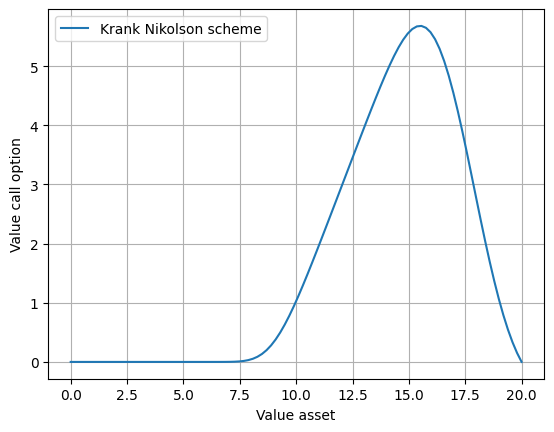

In [6]:
st, dx = np.linspace(0, B, M, retstep=True)
plt.plot(st, a.iloc[0], label='Krank Nikolson scheme')
# plt.plot(st, c, label='BSM')
plt.xlabel("Value asset")
plt.ylabel("Value call option")
plt.grid()
plt.legend()
plt.show()


In [7]:
def P(B, K, T):
    return 1 - np.exp(2 * B * (K-B) / T)

def Monte_Carlo_Up_and_out_Call(N, S, K, B, T, t, M, r, sigma):
    Ci = []
    for i in range(N):
        Z = norm.rvs(size=1)
        x = S * np.exp((r - (sigma ** 2)/2)*T + sigma * np.sqrt(T)*Z)
        if (x-K) > 0:
            Ci.append(np.exp(-1*r*T) * (x-K) * P(B, K , T-t))
        else:
            Ci.append(0)
    Cn = sum(Ci)/len(Ci)
    return Cn


In [8]:
payoff = up_and_out_call_V(t, S, B, sigma, r)
for i in range(5):
    Monte_Carlo_payoff = Monte_Carlo_Up_and_out_Call(1000000, S, K, B, T, t, M, r, sigma)[0]
    print("V =", payoff)
    print("V calculated by Monte Carlo =", Monte_Carlo_payoff)
    print("relative error =", abs(Monte_Carlo_payoff - payoff)/payoff)

V = 1.0285163097900805
V calculated by Monte Carlo = 1.0279220115406071
relative error = 0.0005778209288626836
V = 1.0285163097900805
V calculated by Monte Carlo = 1.0282269119183272
relative error = 0.0002813741201754702
V = 1.0285163097900805
V calculated by Monte Carlo = 1.0272372504185023
relative error = 0.001243596586075707
V = 1.0285163097900805
V calculated by Monte Carlo = 1.0276427109232997
relative error = 0.0008493777477957882
V = 1.0285163097900805
V calculated by Monte Carlo = 1.0277055943612448
relative error = 0.000788237795666238


In [9]:
def explicit_sheme_up_and_out_call(S, K, B, M, N, T, t, r, sigma):
    st = np.linspace(0.1, S * 3, M)
    tau, dt = np.linspace(0, T, N, retstep=True)
    xt, dx = np.linspace(0, B, M, retstep=True)
    u = pd.DataFrame(np.zeros((N, M)),columns=xt, index = tau)
    for i in range(0, M):
        if (xt[i] - K) > 0:
            u.iloc[N-1][i] = xt[i] - K 

    for j in range(N-1, 0, -1):
        for i in range(1, M - 1):
            u.iloc[j - 1, i] = r * xt[i] * dt * ((u.iloc[j, i + 1] - u.iloc[j, i - 1]) / dx / 2)\
                    + 1 / 2 * sigma ** 2 * dt * xt[i] ** 2 * ((u.iloc[j, i - 1] - 2 * u.iloc[j, i] + u.iloc[j, i + 1]) / dx  ** 2)\
                        - (r *  dt - 1) * u.iloc[j, i]
    return u, xt

C:\Users\Samunr1s\AppData\Local\Temp\ipykernel_16872\1952280573.py:8: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Index is deprecated. In a future version, `series[an_int] = val` will insert a new key into the Series. Use `series.iloc[an_int] = val` to treat the key as positional.
  u.iloc[N-1][i] = xt[i] - K
C:\Users\Samunr1s\AppData\Local\Temp\ipykernel_16872\2867906258.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/(sigma * np.sqrt(dt)) *(np.log(s) + (r + 0.5 * sigma ** 2) * dt))
C:\Users\Samunr1s\AppData\Local\Temp\ipykernel_16872\2867906258.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/(sigma * np.sqrt(dt)) *(np.log(s) + (r - 0.5 * sigma ** 2) * dt))


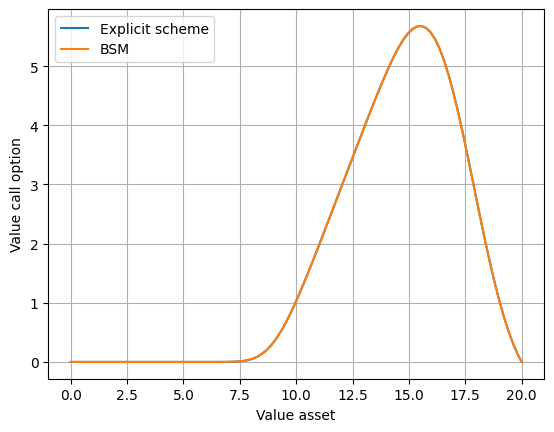

In [10]:
u, xt = explicit_sheme_up_and_out_call(S, K, B, M, N, T, t, r, sigma)
a = get_up_and_out_call_V(S, K, B, T, N, M, r, sigma)
plt.plot(xt, u.iloc[0], label='Explicit scheme')
plt.plot(xt, a.iloc[0], label='BSM')
plt.xlabel("Value asset")
plt.ylabel("Value call option")
plt.grid()
plt.legend()
plt.show()

In [11]:
def look_back_option(t, z, r, sigma):
    tau = T - t
    u = (1 + sigma**2/(2*r)) * z * norm.cdf(d1(tau, z)) + np.exp(-r * tau) * norm.cdf(- d2(tau, z)) - sigma**2/(2*r) * np.exp(-r * tau) * np.power(z, 1 - 2*r/(sigma**2)) * norm.cdf(- d2(tau, 1/z)) - z
    return u

def get_look_back_option(T, N, M, r, sigma):
    tau, dt = np.linspace(0, T, N, retstep=True)
    z, dx = np.linspace(0.000000001, 1, M, retstep=True)
    a = pd.DataFrame(np.zeros((N, M)),columns=z, index = tau)
    for j in range(0, N-1):
            for i in range(0, M):
                a.iloc[j, i] = look_back_option(tau[j], z[i], r, sigma)
    return a

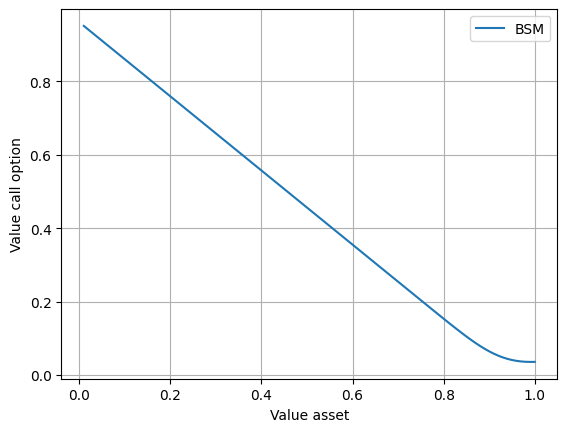

In [78]:
a = get_look_back_option(T, N, M, r, sigma)
z, dx = np.linspace(0.01, 1, M, retstep=True)
plt.plot(z, a.iloc[0], label='BSM')
plt.xlabel("Value asset")
plt.ylabel("Value call option")
plt.grid()
plt.legend()
plt.show()

In [13]:
def explicit_sheme_look_back_option(M, N, T, t, r, sigma):
    tau, dt = np.linspace(0, T, N, retstep=True)
    z, dx = np.linspace(0.000000001, 1, M, retstep=True)
    u = pd.DataFrame(np.zeros((N, M)),columns=z, index = tau)
    for i in range(0, M):
        u.iloc[N-1, i] = 1 - z[i]
    for j in range(0, N):
        u.iloc[j, 0] = np.exp(-r * (T - tau[j]))

    for j in range(N-1, 0, -1):
        for i in range(1, M - 1):
            u.iloc[j - 1, i] = + r * z[i] * dt * ((u.iloc[j, i + 1] - u.iloc[j, i - 1]) / dx / 2)\
                    + 1 / 2 * sigma ** 2 * dt * z[i] ** 2 * ((u.iloc[j, i - 1] - 2 * u.iloc[j, i] + u.iloc[j, i + 1]) / dx  ** 2)\
                        - (r *  dt - 1) * u.iloc[j, i]
#         u.iloc[j - 1, M - 1] = u.iloc[j - 1, M - 3] * 2 * dx + u.iloc[j - 1, M - 2]
        u.iloc[j - 1, M - 1] = - u.iloc[j - 1, M - 2] * (dx - 1)
    return u, z

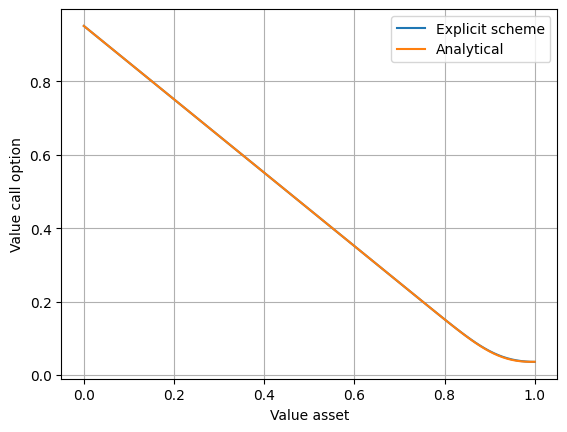

In [94]:
# u, z = explicit_sheme_look_back_option(M, N, T, t, r, sigma)
# a = get_look_back_option(T, N, M, r, sigma)
plt.plot(z, u.iloc[0], label='Explicit scheme')
plt.plot(z, a.iloc[0], label='Analytical')
plt.xlabel("Value asset")
plt.ylabel("Value call option")
plt.grid()
plt.legend()
plt.show()

In [83]:
def Monte_Carlo_lookback(S, T, N, M , r, sigma):
    dt = T/M
    Ci = []
    for i in range(N):
        max_S = S
        x = [S]
        for j in range(1, M+1):
            Si = x[-1]
            dS = Si * (r * dt + sigma * norm.rvs(size=1) * np.sqrt(dt))
            x.append(Si + dS)
            if x[-1] > max_S: 
                max_S = x[-1] 
        Ci.append(np.exp(-1*r*T) * (max_S - x[-1]))
    Cn = sum(Ci)/len(Ci)
    return Cn

In [115]:
payoff = S * look_back_option(t, 1, r, sigma)
for i in range(0, 5):
    Monte_Carlo_payoff = Monte_Carlo_lookback(S, T, 1000, 1000 , r, sigma)
    print("V =", payoff)
    print("V calculated by Monte Carlo =", Monte_Carlo_payoff[0])
    print("relative error =", abs(Monte_Carlo_payoff[0] - payoff)/Monte_Carlo_payoff[0])

V = 0.3582055702223519
V calculated by Monte Carlo = 0.35235282469819806
relative error = 0.016610468581220814
V = 0.3582055702223519
V calculated by Monte Carlo = 0.34252502605144747
relative error = 0.04577926568363852
V = 0.3582055702223519
V calculated by Monte Carlo = 0.3426338643265579
relative error = 0.045447071982799944
V = 0.3582055702223519
V calculated by Monte Carlo = 0.3468053721108191
relative error = 0.03287203436943867
V = 0.3582055702223519
V calculated by Monte Carlo = 0.3564640251913745
relative error = 0.00488561231401238


In [112]:
def density(B, tau_m):
    return B/(tau_m * np.sqrt(2*np.pi * tau_m)) * np.exp(-B**2/2/tau_m)

def get_density(B, T):
    tau = np.linspace(0.00001, T * 10000, N * 1000)
    pmax = 0
    tmax = 0
    distribution = []
    for tau_m in tau:
        density1 = density(B, tau_m)
        distribution.append(density1)
        if (density1 > pmax):
            pmax = density1
            tmax = tau_m
    return distribution, tau, pmax, tmax

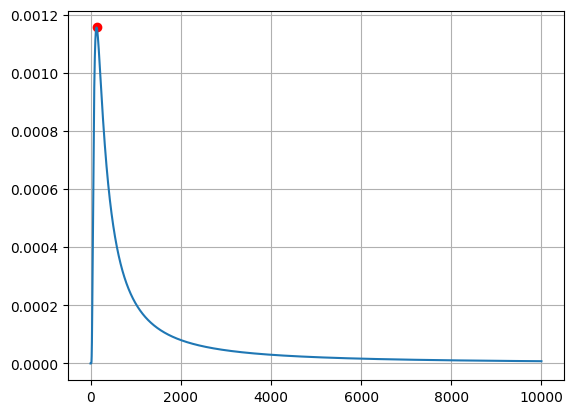

Maximum = 133.3301431968032 0.001156352473031784


In [113]:
distribution, tau, pmax, tmax = get_density(B, T)
plt.plot(tau, distribution)
plt.grid()
plt.scatter(tmax, pmax, color = "red")
plt.show()

print("Maximum =", tmax, pmax)

In [203]:
def explicit_sheme_azian_option(S, M, N, T, t, r, sigma):
    tau, dt = np.linspace(0, T, N, retstep=True)
    xt, dx = np.linspace(-1, 1, M, retstep=True)
    u = pd.DataFrame(np.zeros((N, M)),columns=xt, index = tau)
    for i in range(0, M):
        if xt[i] > 0:
            u.iloc[N-1, i] = xt[i]
    for j in range(0, N):
        u.iloc[j, M-1] = xt[i]
    gamma1 = []
    gamma = np.linspace(0,0,N)
    for i in range(0, N):
        gamma[i] = 1 / r / T * (1 - np.exp(-r * (T - tau[i])))

    for j in range(N-1, 0, -1):
        for i in range(1, M - 1):
            u.iloc[j - 1, i] = u.iloc[j, i] + abs(dt) * sigma ** 2 / 2 * (gamma[j] - xt[i]) ** 2 * ((u.iloc[j, i - 1] - 2 * u.iloc[j, i] + u.iloc[j, i + 1]) / dx  ** 2)
            # print('gamma = ', (gamma[j] - xt[i]) ** 2)
            # print('j =', j, 'i=', i, 'second =', (u.iloc[j, i - 1] - 2 * u.iloc[j, i] + u.iloc[j, i + 1]) / dx  ** 2)
            # # print(abs(dt) * sigma ** 2 / 2)
        gamma1.append(gamma)
    return u, xt, gamma1

gamma =  0.9600040812162024
j = 999 i= 1 second = 0.0
gamma =  0.9208244056728905
j = 999 i= 2 second = 0.0
gamma =  0.8824609733700643
j = 999 i= 3 second = 0.0
gamma =  0.8449137843077238
j = 999 i= 4 second = 0.0
gamma =  0.8081828384858688
j = 999 i= 5 second = 0.0
gamma =  0.7722681359044995
j = 999 i= 6 second = 0.0
gamma =  0.7371696765636159
j = 999 i= 7 second = 0.0
gamma =  0.7028874604632179
j = 999 i= 8 second = 0.0
gamma =  0.6694214876033057
j = 999 i= 9 second = 0.0
gamma =  0.6367717579838792
j = 999 i= 10 second = 0.0
gamma =  0.6049382716049383
j = 999 i= 11 second = 0.0
gamma =  0.573921028466483
j = 999 i= 12 second = 0.0
gamma =  0.5437200285685134
j = 999 i= 13 second = 0.0
gamma =  0.5143352719110295
j = 999 i= 14 second = 0.0
gamma =  0.4857667584940313
j = 999 i= 15 second = 0.0
gamma =  0.4580144883175185
j = 999 i= 16 second = 0.0
gamma =  0.4310784613814917
j = 999 i= 17 second = 0.0
gamma =  0.4049586776859504
j = 999 i= 18 second = 0.0
gamma =  0.379655137

gamma =  0.21044043322463446
j = 983 i= 73 second = -5.440647932175579e-13
gamma =  0.2293834182727249
j = 983 i= 74 second = 5.440647932175579e-13
gamma =  0.2491426465613012
j = 983 i= 75 second = -5.440647932175579e-13
gamma =  0.26971811809036295
j = 983 i= 76 second = 0.0
gamma =  0.2911098328599104
j = 983 i= 77 second = 5.440647932175579e-13
gamma =  0.31331779086994366
j = 983 i= 78 second = -5.440647932175579e-13
gamma =  0.3363419921204624
j = 983 i= 79 second = 5.440647932175579e-13
gamma =  0.36018243661146704
j = 983 i= 80 second = -5.440647932175579e-13
gamma =  0.3848391243429571
j = 983 i= 81 second = 5.440647932175579e-13
gamma =  0.4103120553149331
j = 983 i= 82 second = -5.440647932175579e-13
gamma =  0.4366012295273945
j = 983 i= 83 second = 0.0
gamma =  0.46370664698034153
j = 983 i= 84 second = 5.440647932175579e-13
gamma =  0.4916283076737745
j = 983 i= 85 second = -5.440647932175579e-13
gamma =  0.5203662116076929
j = 983 i= 86 second = 5.440647932175579e-13
gam

gamma =  0.2967532220872776
j = 968 i= 78 second = -5.440647932175579e-13
gamma =  0.3191714691783613
j = 968 i= 79 second = 5.440647932175579e-13
gamma =  0.3424059595099309
j = 968 i= 80 second = -5.440647932175579e-13
gamma =  0.366456693081986
j = 968 i= 81 second = 5.440647932175579e-13
gamma =  0.39132366989452694
j = 968 i= 82 second = -5.440647932175579e-13
gamma =  0.4170068899475533
j = 968 i= 83 second = 0.0
gamma =  0.44350635324106535
j = 968 i= 84 second = 5.440647932175579e-13
gamma =  0.4708220597750633
j = 968 i= 85 second = -5.440647932175579e-13
gamma =  0.49895400954954666
j = 968 i= 86 second = 5.440647932175579e-13
gamma =  0.527902202564516
j = 968 i= 87 second = -5.440647932175579e-13
gamma =  0.5576666388199707
j = 968 i= 88 second = 5.440647932175579e-13
gamma =  0.5882473183159114
j = 968 i= 89 second = -5.440647932175579e-13
gamma =  0.6196442410523373
j = 968 i= 90 second = 0.0
gamma =  0.651857407029249
j = 968 i= 91 second = 5.440647932175579e-13
gamma = 

gamma =  0.1677321017427987
j = 954 i= 72 second = 5.440647932175579e-13
gamma =  0.18468774246773
j = 954 i= 73 second = -5.440647932175579e-13
gamma =  0.2024596264331468
j = 954 i= 74 second = 5.440647932175579e-13
gamma =  0.22104775363904944
j = 954 i= 75 second = -5.440647932175579e-13
gamma =  0.24045212408543756
j = 954 i= 76 second = 0.0
gamma =  0.2606727377723113
j = 954 i= 77 second = 5.440647932175579e-13
gamma =  0.281709594699671
j = 954 i= 78 second = -5.440647932175579e-13
gamma =  0.3035626948675161
j = 954 i= 79 second = 5.440647932175579e-13
gamma =  0.32623203827584707
j = 954 i= 80 second = -5.440647932175579e-13
gamma =  0.34971762492466346
j = 954 i= 81 second = 5.440647932175579e-13
gamma =  0.3740194548139658
j = 954 i= 82 second = -5.440647932175579e-13
gamma =  0.39913752794375357
j = 954 i= 83 second = 0.0
gamma =  0.42507184431402695
j = 954 i= 84 second = 5.440647932175579e-13
gamma =  0.4518224039247863
j = 954 i= 85 second = -5.440647932175579e-13
gamma

gamma =  0.8831410074391255
j = 938 i= 6 second = 1.5082404846883707e-119
gamma =  0.8455791968045463
j = 938 i= 7 second = 7.802851611025047e-117
gamma =  0.8088336294104528
j = 938 i= 8 second = 3.931205917113496e-114
gamma =  0.772904305256845
j = 938 i= 9 second = 1.9348124506648522e-111
gamma =  0.7377912243437229
j = 938 i= 10 second = 9.329444844930722e-109
gamma =  0.7034943866710863
j = 938 i= 11 second = 4.419432840196259e-106
gamma =  0.6700137922389354
j = 938 i= 12 second = 2.062054165287157e-103
gamma =  0.6373494410472702
j = 938 i= 13 second = 9.500248028958053e-101
gamma =  0.6055013330960907
j = 938 i= 14 second = 4.3321996620639704e-98
gamma =  0.5744694683853969
j = 938 i= 15 second = 1.959858850659661e-95
gamma =  0.5442538469151885
j = 938 i= 16 second = 8.815810313725943e-93
gamma =  0.5148544686854661
j = 938 i= 17 second = 3.951662557110461e-90
gamma =  0.48627133369622927
j = 938 i= 18 second = 1.7689826688440517e-87
gamma =  0.4585044419474781
j = 938 i= 19 s

j = 923 i= 75 second = -5.440647932175579e-13
gamma =  0.2110685421349468
j = 923 i= 76 second = 0.0
gamma =  0.2300391674008088
j = 923 i= 77 second = 5.440647932175579e-13
gamma =  0.24982603590715668
j = 923 i= 78 second = -5.440647932175579e-13
gamma =  0.27042914765399
j = 923 i= 79 second = 5.440647932175579e-13
gamma =  0.29184850264130924
j = 923 i= 80 second = -5.440647932175579e-13
gamma =  0.31408410086911387
j = 923 i= 81 second = 5.440647932175579e-13
gamma =  0.3371359423374044
j = 923 i= 82 second = -5.440647932175579e-13
gamma =  0.3610040270461804
j = 923 i= 83 second = 0.0
gamma =  0.385688354995442
j = 923 i= 84 second = 5.440647932175579e-13
gamma =  0.4111889261851896
j = 923 i= 85 second = -5.440647932175579e-13
gamma =  0.4375057406154225
j = 923 i= 86 second = 5.440647932175579e-13
gamma =  0.46463879828614146
j = 923 i= 87 second = -5.440647932175579e-13
gamma =  0.4925880991973457
j = 923 i= 88 second = 5.440647932175579e-13
gamma =  0.521353643349036
j = 923 

j = 909 i= 92 second = -5.440647932175579e-13
gamma =  0.6223638253197551
j = 909 i= 93 second = 5.440647932175579e-13
gamma =  0.6546467101717478
j = 909 i= 94 second = -5.440647932175579e-13
gamma =  0.6877458382642259
j = 909 i= 95 second = 0.0
gamma =  0.7216612095971896
j = 909 i= 96 second = 5.440647932175579e-13
gamma =  0.7563928241706394
j = 909 i= 97 second = -5.440647932175579e-13
gamma =  0.7919406819845743
j = 909 i= 98 second = 0.0
gamma =  1.146359829042089
j = 908 i= 1 second = 1.447230484753736e-118
gamma =  1.1035080740647294
j = 908 i= 2 second = 2.9137957620521324e-116
gamma =  1.0614725623278554
j = 908 i= 3 second = 5.864839662976677e-114
gamma =  1.0202532938314666
j = 908 i= 4 second = 1.1813029832559543e-111
gamma =  0.9798502685755638
j = 908 i= 5 second = 2.38339527859519e-109
gamma =  0.9402634865601466
j = 908 i= 6 second = 4.821506183699737e-107
gamma =  0.9014929477852149
j = 908 i= 7 second = 9.789158620155182e-105
gamma =  0.863538652250769
j = 908 i= 8

j = 891 i= 69 second = 5.440647932175579e-13
gamma =  0.09383498379146632
j = 891 i= 70 second = -5.440647932175579e-13
gamma =  0.10661987164856324
j = 891 i= 71 second = 0.0
gamma =  0.1202210027461458
j = 891 i= 72 second = 5.440647932175579e-13
gamma =  0.1346383770842142
j = 891 i= 73 second = -5.440647932175579e-13
gamma =  0.14987199466276807
j = 891 i= 74 second = 5.440647932175579e-13
gamma =  0.16592185548180782
j = 891 i= 75 second = -5.440647932175579e-13
gamma =  0.18278795954133303
j = 891 i= 76 second = 0.0
gamma =  0.2004703068413439
j = 891 i= 77 second = 5.440647932175579e-13
gamma =  0.21896889738184064
j = 891 i= 78 second = -5.440647932175579e-13
gamma =  0.23828373116282284
j = 891 i= 79 second = 5.440647932175579e-13
gamma =  0.2584148081842909
j = 891 i= 80 second = -5.440647932175579e-13
gamma =  0.2793621284462444
j = 891 i= 81 second = 5.440647932175579e-13
gamma =  0.3011256919486839
j = 891 i= 82 second = -5.440647932175579e-13
gamma =  0.3237054986916087
j

gamma =  0.004513778437758586
j = 874 i= 59 second = -5.440647932175579e-13
gamma =  0.007636431744635541
j = 874 i= 60 second = 5.440647932175579e-13
gamma =  0.011575328291998201
j = 874 i= 61 second = -5.440647932175579e-13
gamma =  0.016330468079846477
j = 874 i= 62 second = 5.440647932175579e-13
gamma =  0.02190185110818048
j = 874 i= 63 second = -5.440647932175579e-13
gamma =  0.02828947737700008
j = 874 i= 64 second = 0.0
gamma =  0.035493346886305344
j = 874 i= 65 second = 5.440647932175579e-13
gamma =  0.04351345963609635
j = 874 i= 66 second = -5.440647932175579e-13
gamma =  0.052349815626372934
j = 874 i= 67 second = 5.440647932175579e-13
gamma =  0.062002414857135285
j = 874 i= 68 second = -5.440647932175579e-13
gamma =  0.07247125732838319
j = 874 i= 69 second = 5.440647932175579e-13
gamma =  0.08375634304011688
j = 874 i= 70 second = -5.440647932175579e-13
gamma =  0.09585767199233611
j = 874 i= 71 second = 0.0
gamma =  0.108775244185041
j = 874 i= 72 second = 5.440647932

j = 856 i= 18 second = 1.4939415186558088e-69
gamma =  0.5757679250176461
j = 856 i= 19 second = 1.8485496742453726e-67
gamma =  0.5455177141038416
j = 856 i= 20 second = 2.3389759186992778e-65
gamma =  0.5160837464305228
j = 856 i= 21 second = 3.0287684201649007e-63
gamma =  0.48746602199768985
j = 856 i= 22 second = 4.017075576572356e-61
gamma =  0.4596645408053422
j = 856 i= 23 second = 5.46166278621472e-59
gamma =  0.43267930285348055
j = 856 i= 24 second = 7.618814902692679e-57
gamma =  0.4065103081421044
j = 856 i= 25 second = 1.091399028194929e-54
gamma =  0.3811575566712139
j = 856 i= 26 second = 1.6069712888241876e-52
gamma =  0.3566210484408091
j = 856 i= 27 second = 2.434244325573735e-50
gamma =  0.33290078345088997
j = 856 i= 28 second = 3.7971879054865153e-48
gamma =  0.3099967617014566
j = 856 i= 29 second = 6.105456140402305e-46
gamma =  0.28790898319250885
j = 856 i= 30 second = 1.012866520279233e-43
gamma =  0.2666374479240467
j = 856 i= 31 second = 1.7353419869984986e

j = 841 i= 53 second = 3.301152237504545e-07
gamma =  0.004438938904825473
j = 841 i= 54 second = 1.3900855466708603e-10
gamma =  0.00215512669378916
j = 841 i= 55 second = 5.440647932175579e-13
gamma =  0.0006875577232384928
j = 841 i= 56 second = -5.440647932175579e-13
gamma =  3.6231993173503575e-05
j = 841 i= 57 second = 0.0
gamma =  0.00020114950359417165
j = 841 i= 58 second = 5.440647932175579e-13
gamma =  0.0011823102545005122
j = 841 i= 59 second = -5.440647932175579e-13
gamma =  0.002979714245892504
j = 841 i= 60 second = 5.440647932175579e-13
gamma =  0.005593361477770186
j = 841 i= 61 second = -5.440647932175579e-13
gamma =  0.009023251950133501
j = 841 i= 62 second = 5.440647932175579e-13
gamma =  0.013269385662982525
j = 841 i= 63 second = -5.440647932175579e-13
gamma =  0.018331762616317162
j = 841 i= 64 second = 0.0
gamma =  0.02421038281013746
j = 841 i= 65 second = 5.440647932175579e-13
gamma =  0.03090524624444349
j = 841 i= 66 second = -5.440647932175579e-13
gamma =

j = 828 i= 69 second = 5.440647932175579e-13
gamma =  0.05939000534614234
j = 828 i= 70 second = -5.440647932175579e-13
gamma =  0.0696446177540918
j = 828 i= 71 second = 0.0
gamma =  0.08071547340252691
j = 828 i= 72 second = 5.440647932175579e-13
gamma =  0.09260257229144782
j = 828 i= 73 second = -5.440647932175579e-13
gamma =  0.10530591442085425
j = 828 i= 74 second = 5.440647932175579e-13
gamma =  0.1188254997907465
j = 828 i= 75 second = -5.440647932175579e-13
gamma =  0.13316132840112427
j = 828 i= 76 second = 0.0
gamma =  0.14831340025198766
j = 828 i= 77 second = 5.440647932175579e-13
gamma =  0.16428171534333694
j = 828 i= 78 second = -5.440647932175579e-13
gamma =  0.18106627367517167
j = 828 i= 79 second = 5.440647932175579e-13
gamma =  0.19866707524749228
j = 828 i= 80 second = -5.440647932175579e-13
gamma =  0.21708412006029834
j = 828 i= 81 second = 5.440647932175579e-13
gamma =  0.23631740811359025
j = 828 i= 82 second = -5.440647932175579e-13
gamma =  0.25636693940736

gamma =  0.062011556830659204
j = 813 i= 71 second = 0.0
gamma =  0.07248114097829016
j = 813 i= 72 second = 5.440647932175579e-13
gamma =  0.0837669683664069
j = 813 i= 73 second = -5.440647932175579e-13
gamma =  0.09586903899500919
j = 813 i= 74 second = 5.440647932175579e-13
gamma =  0.10878735286409727
j = 813 i= 75 second = -5.440647932175579e-13
gamma =  0.12252190997367088
j = 813 i= 76 second = 0.0
gamma =  0.13707271032373014
j = 813 i= 77 second = 5.440647932175579e-13
gamma =  0.15243975391427522
j = 813 i= 78 second = -5.440647932175579e-13
gamma =  0.16862304074530582
j = 813 i= 79 second = 5.440647932175579e-13
gamma =  0.18562257081682226
j = 813 i= 80 second = -5.440647932175579e-13
gamma =  0.20343834412882417
j = 813 i= 81 second = 5.440647932175579e-13
gamma =  0.22207036068131195
j = 813 i= 82 second = -5.440647932175579e-13
gamma =  0.24151862047428518
j = 813 i= 83 second = 0.0
gamma =  0.2617831235077441
j = 813 i= 84 second = 5.440647932175579e-13
gamma =  0.282

j = 797 i= 39 second = 8.398235678861721e-20
gamma =  0.15452972239172738
j = 797 i= 40 second = 1.081620300259047e-17
gamma =  0.13905490717041763
j = 797 i= 41 second = 1.4135415083806246e-15
gamma =  0.12439633518959364
j = 797 i= 42 second = 1.8641679474641106e-13
gamma =  0.11055400644925523
j = 797 i= 43 second = 2.4609484300240773e-11
gamma =  0.09752792094940249
j = 797 i= 44 second = 3.2133427342814103e-09
gamma =  0.08531807869003541
j = 797 i= 45 second = 4.074406824431958e-07
gamma =  0.07392447967115401
j = 797 i= 46 second = 4.870372843464155e-05
gamma =  0.06334712389275826
j = 797 i= 47 second = 0.005212899830655851
gamma =  0.05358601135484823
j = 797 i= 48 second = 0.45107599520710673
gamma =  0.04464114205742382
j = 797 i= 49 second = 24.176208385445765
gamma =  0.036512516000485065
j = 797 i= 50 second = 24.525063361508845
gamma =  0.029200133184031942
j = 797 i= 51 second = 0.34058916661111716
gamma =  0.022703993608064563
j = 797 i= 52 second = 0.00179645686636965

gamma =  0.7935764756955183
j = 784 i= 16 second = 6.100443746313262e-64
gamma =  0.7579915025864967
j = 784 i= 17 second = 4.228228083514003e-62
gamma =  0.7232227727179608
j = 784 i= 18 second = 2.9887295145884095e-60
gamma =  0.6892702860899104
j = 784 i= 19 second = 2.15538151829791e-58
gamma =  0.6561340427023457
j = 784 i= 20 second = 1.586534364061517e-56
gamma =  0.6238140425552666
j = 784 i= 21 second = 1.1924513935258465e-54
gamma =  0.5923102856486735
j = 784 i= 22 second = 9.155342649596993e-53
gamma =  0.5616227719825656
j = 784 i= 23 second = 7.183328511627471e-51
gamma =  0.5317515015569437
j = 784 i= 24 second = 5.761888146959364e-49
gamma =  0.5026964743718074
j = 784 i= 25 second = 4.72669076076842e-47
gamma =  0.47445769042715674
j = 784 i= 26 second = 3.966984497424108e-45
gamma =  0.4470351497229917
j = 784 i= 27 second = 3.407391916637504e-43
gamma =  0.42042885225931237
j = 784 i= 28 second = 2.996232368225573e-41
gamma =  0.3946387980361188
j = 784 i= 29 second 

j = 771 i= 15 second = 2.9075296085195953e-64
gamma =  0.816671233958707
j = 771 i= 16 second = 1.8277270539856934e-62
gamma =  0.7805662791701378
j = 771 i= 17 second = 1.1707560106176504e-60
gamma =  0.745277567622054
j = 771 i= 18 second = 7.6444655404713655e-59
gamma =  0.7108050993144558
j = 771 i= 19 second = 5.0899218670040683e-57
gamma =  0.6771488742473434
j = 771 i= 20 second = 3.4571246481266985e-55
gamma =  0.6443088924207165
j = 771 i= 21 second = 2.3961490884395416e-53
gamma =  0.6122851538345756
j = 771 i= 22 second = 1.6953512352410007e-51
gamma =  0.5810776584889199
j = 771 i= 23 second = 1.2249002884233008e-49
gamma =  0.5506864063837502
j = 771 i= 24 second = 9.040231110130228e-48
gamma =  0.5211113975190661
j = 771 i= 25 second = 6.817593178206621e-46
gamma =  0.4923526318948676
j = 771 i= 26 second = 5.255093401386269e-44
gamma =  0.4644101095111548
j = 771 i= 27 second = 4.1413287428836824e-42
gamma =  0.4372838303679277
j = 771 i= 28 second = 3.337369408419834e-4

gamma =  0.08369921516103081
j = 759 i= 47 second = 0.013264138787458711
gamma =  0.07241811793576082
j = 759 i= 48 second = 0.7242921252334495
gamma =  0.061953263950976424
j = 759 i= 49 second = 23.85031180632063
gamma =  0.0523046532066777
j = 759 i= 50 second = 24.328029307308515
gamma =  0.0434722857028646
j = 759 i= 51 second = 0.5783775099731668
gamma =  0.035456161439537254
j = 759 i= 52 second = 0.005503917069098046
gamma =  0.028256280416695565
j = 759 i= 53 second = 2.7112370367163293e-05
gamma =  0.021872642634339468
j = 759 i= 54 second = 7.548127113968238e-08
gamma =  0.016305248092469103
j = 759 i= 55 second = 1.2282262706886368e-10
gamma =  0.011554096791084349
j = 759 i= 56 second = -5.440647932175579e-13
gamma =  0.007619188730185309
j = 759 i= 57 second = 0.0
gamma =  0.0045005239097719255
j = 759 i= 58 second = 5.440647932175579e-13
gamma =  0.0021981023298441784
j = 759 i= 59 second = -5.440647932175579e-13
gamma =  0.0007119239904021183
j = 759 i= 60 second = 5.44

j = 745 i= 50 second = 24.234983827111662
gamma =  0.049435929417672504
j = 745 i= 51 second = 0.6864930300075085
gamma =  0.04086053911614429
j = 745 i= 52 second = 0.007906342953803021
gamma =  0.03310139205510173
j = 745 i= 53 second = 4.795212459622957e-05
gamma =  0.02615848823454476
j = 745 i= 54 second = 1.6780869250415662e-07
gamma =  0.020031827654473526
j = 745 i= 55 second = 3.510578078236292e-10
gamma =  0.014721410314887893
j = 745 i= 56 second = -2.040242974565842e-13
gamma =  0.010227236215787982
j = 745 i= 57 second = 0.0
gamma =  0.006549305357173728
j = 745 i= 58 second = 5.440647932175579e-13
gamma =  0.0036876177390451053
j = 745 i= 59 second = -5.440647932175579e-13
gamma =  0.0016421733614021751
j = 745 i= 60 second = 5.440647932175579e-13
gamma =  0.0004129722242448932
j = 745 i= 61 second = -5.440647932175579e-13
gamma =  1.4327573286632257e-08
j = 745 i= 62 second = 5.440647932175579e-13
gamma =  0.0004032996713873463
j = 745 i= 63 second = -5.440647932175579e-

gamma =  0.0030629047852385387
j = 730 i= 60 second = 5.440647932175579e-13
gamma =  0.0012349247408864116
j = 730 i= 61 second = -5.440647932175579e-13
gamma =  0.00022318793701996633
j = 730 i= 62 second = 5.440647932175579e-13
gamma =  2.7694373639180847e-05
j = 730 i= 63 second = -5.440647932175579e-13
gamma =  0.0006484440507440593
j = 730 i= 64 second = 0.0
gamma =  0.002085436968334595
j = 730 i= 65 second = 5.440647932175579e-13
gamma =  0.004338673126410817
j = 730 i= 66 second = -5.440647932175579e-13
gamma =  0.007408152524972677
j = 730 i= 67 second = 5.440647932175579e-13
gamma =  0.01129387516402024
j = 730 i= 68 second = -5.440647932175579e-13
gamma =  0.015995841043553425
j = 730 i= 69 second = 5.440647932175579e-13
gamma =  0.02151405016357233
j = 730 i= 70 second = -5.440647932175579e-13
gamma =  0.027848502524076835
j = 730 i= 71 second = 0.0
gamma =  0.034999198125067
j = 730 i= 72 second = 5.440647932175579e-13
gamma =  0.04296613696654291
j = 730 i= 73 second = -5

gamma =  0.09964127137564827
j = 717 i= 79 second = 5.440647932175579e-13
gamma =  0.11280333467944696
j = 717 i= 80 second = -5.440647932175579e-13
gamma =  0.12678164122373117
j = 717 i= 81 second = 5.440647932175579e-13
gamma =  0.1415761910085012
j = 717 i= 82 second = -5.440647932175579e-13
gamma =  0.15718698403375672
j = 717 i= 83 second = 0.0
gamma =  0.1736140202994979
j = 717 i= 84 second = 5.440647932175579e-13
gamma =  0.19085729980572494
j = 717 i= 85 second = -5.440647932175579e-13
gamma =  0.20891682255243746
j = 717 i= 86 second = 5.440647932175579e-13
gamma =  0.22779258853963583
j = 717 i= 87 second = -5.440647932175579e-13
gamma =  0.24748459776731965
j = 717 i= 88 second = 5.440647932175579e-13
gamma =  0.26799285023548935
j = 717 i= 89 second = -5.440647932175579e-13
gamma =  0.28931734594414454
j = 717 i= 90 second = 0.0
gamma =  0.31145808489328536
j = 717 i= 91 second = 5.440647932175579e-13
gamma =  0.3344150670829121
j = 717 i= 92 second = -5.440647932175579e-

j = 700 i= 71 second = 0.0
gamma =  0.024798226756229166
j = 700 i= 72 second = 5.440647932175579e-13
gamma =  0.031568955541118125
j = 700 i= 73 second = -5.440647932175579e-13
gamma =  0.039155927566492665
j = 700 i= 74 second = 5.440647932175579e-13
gamma =  0.04755914283235297
j = 700 i= 75 second = -5.440647932175579e-13
gamma =  0.05677860133869884
j = 700 i= 76 second = 0.0
gamma =  0.06681430308553037
j = 700 i= 77 second = 5.440647932175579e-13
gamma =  0.07766624807284767
j = 700 i= 78 second = -5.440647932175579e-13
gamma =  0.08933443630065052
j = 700 i= 79 second = 5.440647932175579e-13
gamma =  0.10181886776893917
j = 700 i= 80 second = -5.440647932175579e-13
gamma =  0.11511954247771333
j = 700 i= 81 second = 5.440647932175579e-13
gamma =  0.12923646042697332
j = 700 i= 82 second = -5.440647932175579e-13
gamma =  0.1441696216167188
j = 700 i= 83 second = 0.0
gamma =  0.15991902604695
j = 700 i= 84 second = 5.440647932175579e-13
gamma =  0.176484673717667
j = 700 i= 85 se

gamma =  0.44482930160487283
j = 684 i= 98 second = 0.0
gamma =  1.6734683082533954
j = 683 i= 1 second = 2.83483782100146e-77
gamma =  1.6216087114467008
j = 683 i= 2 second = 9.30870766201103e-76
gamma =  1.5705653578804921
j = 683 i= 3 second = 3.093804571630994e-74
gamma =  1.5203382475547684
j = 683 i= 4 second = 1.0419291892777231e-72
gamma =  1.4709273804695309
j = 683 i= 5 second = 3.556358002315868e-71
gamma =  1.422332756624779
j = 683 i= 6 second = 1.230479438408652e-69
gamma =  1.3745543760205121
j = 683 i= 7 second = 4.3164264602319985e-68
gamma =  1.3275922386567311
j = 683 i= 8 second = 1.5354458637243817e-66
gamma =  1.2814463445334363
j = 683 i= 9 second = 5.539662481596001e-65
gamma =  1.2361166936506272
j = 683 i= 10 second = 2.027441361865691e-63
gamma =  1.191603286008303
j = 683 i= 11 second = 7.528455235559123e-62
gamma =  1.1479061216064652
j = 683 i= 12 second = 2.836813816098148e-60
gamma =  1.1050252004451129
j = 683 i= 13 second = 1.084915797339158e-58
gamma

j = 667 i= 2 second = 5.3622265105400025e-74
gamma =  1.6103112109551703
j = 667 i= 3 second = 1.669275849355136e-72
gamma =  1.5594473979323658
j = 667 i= 4 second = 5.264039301058395e-71
gamma =  1.5093998281500476
j = 667 i= 5 second = 1.6818617189083887e-69
gamma =  1.4601685016082149
j = 667 i= 6 second = 5.445187197369041e-68
gamma =  1.4117534183068674
j = 667 i= 7 second = 1.786723532573508e-66
gamma =  1.3641545782460056
j = 667 i= 8 second = 5.942836343733947e-65
gamma =  1.31737198142563
j = 667 i= 9 second = 2.0039683843482728e-63
gamma =  1.27140562784574
j = 667 i= 10 second = 6.8519804148334985e-62
gamma =  1.226255517506335
j = 667 i= 11 second = 2.3759390840287193e-60
gamma =  1.1819216504074164
j = 667 i= 12 second = 8.356263857874256e-59
gamma =  1.1384040265489834
j = 667 i= 13 second = 2.9813147065300545e-57
gamma =  1.0957026459310355
j = 667 i= 14 second = 1.079146613659093e-55
gamma =  1.053817508553574
j = 667 i= 15 second = 3.963551221495583e-54
gamma =  1.012

j = 654 i= 77 second = 5.440647932175579e-13
gamma =  0.05446469724288237
j = 654 i= 78 second = -5.440647932175579e-13
gamma =  0.06430218161673698
j = 654 i= 79 second = 5.440647932175579e-13
gamma =  0.07495590923107737
j = 654 i= 80 second = -5.440647932175579e-13
gamma =  0.0864258800859033
j = 654 i= 81 second = 5.440647932175579e-13
gamma =  0.09871209418121503
j = 654 i= 82 second = -5.440647932175579e-13
gamma =  0.11181455151701228
j = 654 i= 83 second = 0.0
gamma =  0.1257332520932952
j = 654 i= 84 second = 5.440647932175579e-13
gamma =  0.14046819591006393
j = 654 i= 85 second = -5.440647932175579e-13
gamma =  0.15601938296731815
j = 654 i= 86 second = 5.440647932175579e-13
gamma =  0.17238681326505825
j = 654 i= 87 second = -5.440647932175579e-13
gamma =  0.1895704868032838
j = 654 i= 88 second = 5.440647932175579e-13
gamma =  0.20757040358199522
j = 654 i= 89 second = -5.440647932175579e-13
gamma =  0.2263865636011921
j = 654 i= 90 second = 0.0
gamma =  0.2460189668608746

gamma =  0.875796534199113
j = 636 i= 21 second = 1.9881149949714763e-42
gamma =  0.8383929380302685
j = 636 i= 22 second = 7.053235888880648e-41
gamma =  0.8018055851019092
j = 636 i= 23 second = 2.5359353817265715e-39
gamma =  0.766034475414036
j = 636 i= 24 second = 9.238911596197601e-38
gamma =  0.7310796089666484
j = 636 i= 25 second = 3.4099151155693125e-36
gamma =  0.6969409857597463
j = 636 i= 26 second = 1.274638404962216e-34
gamma =  0.6636186057933299
j = 636 i= 27 second = 4.8239200979521214e-33
gamma =  0.6311124690673993
j = 636 i= 28 second = 1.8475428288543973e-31
gamma =  0.5994225755819543
j = 636 i= 29 second = 7.157105319347911e-30
gamma =  0.568548925336995
j = 636 i= 30 second = 2.8024821676362265e-28
gamma =  0.5384915183325212
j = 636 i= 31 second = 1.108309737665431e-26
gamma =  0.5092503545685332
j = 636 i= 32 second = 4.422476174542162e-25
gamma =  0.48082543404503075
j = 636 i= 33 second = 1.7784244160936563e-23
gamma =  0.45321675676201406
j = 636 i= 34 sec

j = 621 i= 72 second = 5.440647932175579e-13
gamma =  0.009985182648510112
j = 621 i= 73 second = -5.440647932175579e-13
gamma =  0.014430713795135186
j = 621 i= 74 second = 5.440647932175579e-13
gamma =  0.01969248818224598
j = 621 i= 75 second = -5.440647932175579e-13
gamma =  0.025770505809842376
j = 621 i= 76 second = 0.0
gamma =  0.03266476667792443
j = 621 i= 77 second = 5.440647932175579e-13
gamma =  0.04037527078649223
j = 621 i= 78 second = -5.440647932175579e-13
gamma =  0.04890201813554561
j = 621 i= 79 second = 5.440647932175579e-13
gamma =  0.05824500872508476
j = 621 i= 80 second = -5.440647932175579e-13
gamma =  0.06840424255510945
j = 621 i= 81 second = 5.440647932175579e-13
gamma =  0.07937971962561995
j = 621 i= 82 second = -5.440647932175579e-13
gamma =  0.09117143993661596
j = 621 i= 83 second = 0.0
gamma =  0.10377940348809765
j = 621 i= 84 second = 5.440647932175579e-13
gamma =  0.11720361028006514
j = 621 i= 85 second = -5.440647932175579e-13
gamma =  0.131444060

j = 605 i= 81 second = 5.440647932175579e-13
gamma =  0.07077435517185286
j = 605 i= 82 second = -5.440647932175579e-13
gamma =  0.0819313454775673
j = 605 i= 83 second = 0.0
gamma =  0.09390457902376738
j = 605 i= 84 second = 5.440647932175579e-13
gamma =  0.10669405581045327
j = 605 i= 85 second = -5.440647932175579e-13
gamma =  0.12029977583762468
j = 605 i= 86 second = 5.440647932175579e-13
gamma =  0.1347217391052819
j = 605 i= 87 second = -5.440647932175579e-13
gamma =  0.14995994561342466
j = 605 i= 88 second = 5.440647932175579e-13
gamma =  0.16601439536205323
j = 605 i= 89 second = -5.440647932175579e-13
gamma =  0.1828850883511673
j = 605 i= 90 second = 0.0
gamma =  0.200572024580767
j = 605 i= 91 second = 5.440647932175579e-13
gamma =  0.2190752040508526
j = 605 i= 92 second = -5.440647932175579e-13
gamma =  0.23839462676142362
j = 605 i= 93 second = 5.440647932175579e-13
gamma =  0.25853029271248057
j = 605 i= 94 second = -5.440647932175579e-13
gamma =  0.2794822019040229
j

gamma =  0.08510186632627029
j = 590 i= 84 second = 5.440647932175579e-13
gamma =  0.09729674518856521
j = 590 i= 85 second = -5.440647932175579e-13
gamma =  0.11030786729134566
j = 590 i= 86 second = 5.440647932175579e-13
gamma =  0.12413523263461192
j = 590 i= 87 second = -5.440647932175579e-13
gamma =  0.1387788412183637
j = 590 i= 88 second = 5.440647932175579e-13
gamma =  0.1542386930426013
j = 590 i= 89 second = -5.440647932175579e-13
gamma =  0.1705147881073244
j = 590 i= 90 second = 0.0
gamma =  0.18760712641253316
j = 590 i= 91 second = 5.440647932175579e-13
gamma =  0.20551570795822777
j = 590 i= 92 second = -5.440647932175579e-13
gamma =  0.22424053274440783
j = 590 i= 93 second = 5.440647932175579e-13
gamma =  0.2437816007710738
j = 590 i= 94 second = -5.440647932175579e-13
gamma =  0.2641389120382252
j = 590 i= 95 second = 0.0
gamma =  0.28531246654586223
j = 590 i= 96 second = 5.440647932175579e-13
gamma =  0.3073022642939852
j = 590 i= 97 second = -5.440647932175579e-13


gamma =  0.1949869939531527
j = 578 i= 92 second = -5.440647932175579e-13
gamma =  0.21323646169956428
j = 578 i= 93 second = 5.440647932175579e-13
gamma =  0.23230217268646175
j = 578 i= 94 second = -5.440647932175579e-13
gamma =  0.2521841269138447
j = 578 i= 95 second = 0.0
gamma =  0.2728823243817132
j = 578 i= 96 second = 5.440647932175579e-13
gamma =  0.2943967650900677
j = 578 i= 97 second = -5.440647932175579e-13
gamma =  0.3167274490389076
j = 578 i= 98 second = 0.0
gamma =  1.9538186361915997
j = 577 i= 1 second = 1.4897046812868254e-66
gamma =  1.8977503688528041
j = 577 i= 2 second = 3.3187239064340066e-65
gamma =  1.842498344754494
j = 577 i= 3 second = 7.459201579596931e-64
gamma =  1.7880625638966692
j = 577 i= 4 second = 1.6951433932643487e-62
gamma =  1.7344430262793307
j = 577 i= 5 second = 3.8953663420962874e-61
gamma =  1.6816397319024776
j = 577 i= 6 second = 9.05209288369703e-60
gamma =  1.6296526807661098
j = 577 i= 7 second = 2.1273416974167026e-58
gamma =  1.57

gamma =  0.2904154844703925
j = 567 i= 44 second = 5.291733696799395e-05
gamma =  0.2690497834528288
j = 567 i= 45 second = 0.0010814652208122118
gamma =  0.24850032567575078
j = 567 i= 46 second = 0.019415540401052974
gamma =  0.22876711113915843
j = 567 i= 47 second = 0.2889769584580088
gamma =  0.20985013984305184
j = 567 i= 48 second = 3.2091855996218976
gamma =  0.19174941178743082
j = 567 i= 49 second = 20.829015599430264
gamma =  0.17446492697229546
j = 567 i= 50 second = 21.915664116640773
gamma =  0.15799668539764566
j = 567 i= 51 second = 3.03335533090979
gamma =  0.14234468706348175
j = 567 i= 52 second = 0.1955780777169636
gamma =  0.12750893196980345
j = 567 i= 53 second = 0.007480589154873491
gamma =  0.11348942011661067
j = 567 i= 54 second = 0.00018802607010377084
gamma =  0.10028615150390371
j = 567 i= 55 second = 3.2775663486375724e-06
gamma =  0.08789912613168228
j = 567 i= 56 second = 4.0861102189315706e-08
gamma =  0.07632834399994665
j = 567 i= 57 second = 3.71120

gamma =  0.11176960292700254
j = 551 i= 88 second = 5.440647932175579e-13
gamma =  0.12568558765588944
j = 551 i= 89 second = -5.440647932175579e-13
gamma =  0.14041781562526187
j = 551 i= 90 second = 0.0
gamma =  0.15596628683511995
j = 551 i= 91 second = 5.440647932175579e-13
gamma =  0.17233100128546386
j = 551 i= 92 second = -5.440647932175579e-13
gamma =  0.18951195897629328
j = 551 i= 93 second = 5.440647932175579e-13
gamma =  0.20750915990760854
j = 551 i= 94 second = -5.440647932175579e-13
gamma =  0.22632260407940924
j = 551 i= 95 second = 0.0
gamma =  0.24595229149169565
j = 551 i= 96 second = 5.440647932175579e-13
gamma =  0.2663982221444679
j = 551 i= 97 second = -5.440647932175579e-13
gamma =  0.2876603960377256
j = 551 i= 98 second = 0.0
gamma =  2.028445127401182
j = 550 i= 1 second = 3.5169376358664864e-64
gamma =  1.9713084034844477
j = 550 i= 2 second = 7.190858921018759e-63
gamma =  1.914987922808199
j = 550 i= 3 second = 1.4819674147040475e-61
gamma =  1.85948368537

j = 536 i= 18 second = 1.903437921538644e-40
gamma =  1.1541126702888607
j = 536 i= 19 second = 4.419162651687506e-39
gamma =  1.1111148783515676
j = 536 i= 20 second = 1.0357114786085904e-37
gamma =  1.0689333296547598
j = 536 i= 21 second = 2.4498022931074623e-36
gamma =  1.0275680241984384
j = 536 i= 22 second = 5.84646665717198e-35
gamma =  0.9870189619826019
j = 536 i= 23 second = 1.4072812130316841e-33
gamma =  0.9472861430072516
j = 536 i= 24 second = 3.415252312109964e-32
gamma =  0.9083695672723867
j = 536 i= 25 second = 8.352559400228409e-31
gamma =  0.8702692347780075
j = 536 i= 26 second = 2.0574907343927064e-29
gamma =  0.832985145524114
j = 536 i= 27 second = 5.101586124246034e-28
gamma =  0.7965172995107062
j = 536 i= 28 second = 1.2723404954670958e-26
gamma =  0.7608656967377841
j = 536 i= 29 second = 3.189043666490232e-25
gamma =  0.7260303372053476
j = 536 i= 30 second = 8.024937294706156e-24
gamma =  0.6920112209133967
j = 536 i= 31 second = 2.0250567018500899e-22
ga

j = 525 i= 65 second = 5.440647932175579e-13
gamma =  0.01837576386469453
j = 525 i= 66 second = -5.440647932175579e-13
gamma =  0.01330682549926667
j = 525 i= 67 second = 5.440647932175579e-13
gamma =  0.009054130374324423
j = 525 i= 68 second = -5.440647932175579e-13
gamma =  0.005617678489867885
j = 525 i= 69 second = 5.440647932175579e-13
gamma =  0.00299746984589698
j = 525 i= 70 second = -5.440647932175579e-13
gamma =  0.0011935044424117663
j = 525 i= 71 second = 0.0
gamma =  0.00020578227941220952
j = 525 i= 72 second = 5.440647932175579e-13
gamma =  3.4303356898312736e-05
j = 525 i= 73 second = -5.440647932175579e-13
gamma =  0.0006790676748700796
j = 525 i= 74 second = 5.440647932175579e-13
gamma =  0.0021400752333275244
j = 525 i= 75 second = -5.440647932175579e-13
gamma =  0.004417326032270615
j = 525 i= 76 second = 0.0
gamma =  0.007510820071699362
j = 525 i= 77 second = 5.440647932175579e-13
gamma =  0.011420557351613816
j = 525 i= 78 second = -5.440647932175579e-13
gamma 

j = 511 i= 98 second = 0.0
gamma =  2.1413816330635322
j = 510 i= 1 second = 7.095040099673115e-61
gamma =  2.0826646621546594
j = 510 i= 2 second = 1.2869614188925572e-59
gamma =  2.0247639344862725
j = 510 i= 3 second = 2.349507678402932e-58
gamma =  1.9676794500583703
j = 510 i= 4 second = 4.330779953315461e-57
gamma =  1.9114112088709543
j = 510 i= 5 second = 8.060231280262027e-56
gamma =  1.8559592109240242
j = 510 i= 6 second = 1.5147053672623837e-54
gamma =  1.8013234562175788
j = 510 i= 7 second = 2.8741661581475996e-53
gamma =  1.7475039447516194
j = 510 i= 8 second = 5.506791575178435e-52
gamma =  1.694500676526146
j = 510 i= 9 second = 1.0653302843404809e-50
gamma =  1.6423136515411585
j = 510 i= 10 second = 2.0809414501905655e-49
gamma =  1.5909428697966561
j = 510 i= 11 second = 4.1040363986930014e-48
gamma =  1.5403883312926399
j = 510 i= 12 second = 8.171808288219776e-47
gamma =  1.4906500360291093
j = 510 i= 13 second = 1.6426837618872155e-45
gamma =  1.4417279840060637

j = 496 i= 34 second = 5.863172613536605e-17
gamma =  0.6243334743948945
j = 496 i= 35 second = 1.2413507553475206e-15
gamma =  0.5928164342055628
j = 496 i= 36 second = 2.601328401587604e-14
gamma =  0.5621156372567166
j = 496 i= 37 second = 5.376876479506342e-13
gamma =  0.5322310835483561
j = 496 i= 38 second = 1.0916465688834853e-11
gamma =  0.5031627730804812
j = 496 i= 39 second = 2.1658799412844625e-10
gamma =  0.47491070585309203
j = 496 i= 40 second = 4.1730127590105656e-09
gamma =  0.4474748818661885
j = 496 i= 41 second = 7.746369947590732e-08
gamma =  0.42085530111977076
j = 496 i= 42 second = 1.371528671271382e-06
gamma =  0.39505196361383854
j = 496 i= 43 second = 2.2859307396343696e-05
gamma =  0.370064869348392
j = 496 i= 44 second = 0.0003523826136835215
gamma =  0.3458940183234311
j = 496 i= 45 second = 0.004902184204653959
gamma =  0.3225394105389559
j = 496 i= 46 second = 0.059366511092279736
gamma =  0.30000104599496635
j = 496 i= 47 second = 0.5912223647736674
gam

gamma =  1.5105059217424872
j = 481 i= 14 second = 1.9489080635119833e-42
gamma =  1.4612564105489145
j = 481 i= 15 second = 3.6416356927300573e-41
gamma =  1.412823142595827
j = 481 i= 16 second = 6.86131558062454e-40
gamma =  1.3652061178832258
j = 481 i= 17 second = 1.3033052302796348e-38
gamma =  1.3184053364111095
j = 481 i= 18 second = 2.495295322179795e-37
gamma =  1.2724207981794795
j = 481 i= 19 second = 4.814259996973807e-36
gamma =  1.2272525031883352
j = 481 i= 20 second = 9.357227331204689e-35
gamma =  1.182900451437676
j = 481 i= 21 second = 1.8316164111449406e-33
gamma =  1.1393646429275028
j = 481 i= 22 second = 3.60935886265253e-32
gamma =  1.0966450776578152
j = 481 i= 23 second = 7.157282427711645e-31
gamma =  1.0547417556286134
j = 481 i= 24 second = 1.4274982169648442e-29
gamma =  1.0136546768398969
j = 481 i= 25 second = 2.8619856951829738e-28
gamma =  0.9733838412916664
j = 481 i= 26 second = 5.7642461572866124e-27
gamma =  0.9339292489839216
j = 481 i= 27 second

j = 466 i= 54 second = 0.00234997878183131
gamma =  0.17253126737154906
j = 466 i= 55 second = 8.721111922296158e-05
gamma =  0.15615680988341563
j = 466 i= 56 second = 2.402382974178718e-06
gamma =  0.14059859563576804
j = 466 i= 57 second = 5.0172907141432515e-08
gamma =  0.1258566246286061
j = 466 i= 58 second = 8.058959749535076e-10
gamma =  0.11193089686192971
j = 466 i= 59 second = 9.385117683002873e-12
gamma =  0.09882141233573911
j = 466 i= 60 second = 5.440647932175579e-13
gamma =  0.08652817105003403
j = 466 i= 61 second = -5.440647932175579e-13
gamma =  0.07505117300481476
j = 466 i= 62 second = 5.440647932175579e-13
gamma =  0.06439041820008103
j = 466 i= 63 second = -5.440647932175579e-13
gamma =  0.05454590663583308
j = 466 i= 64 second = 0.0
gamma =  0.045517638312070785
j = 466 i= 65 second = 5.440647932175579e-13
gamma =  0.03730561322879406
j = 466 i= 66 second = -5.440647932175579e-13
gamma =  0.02990983138600309
j = 466 i= 67 second = 5.440647932175579e-13
gamma =  

j = 449 i= 8 second = 6.822544073592185e-48
gamma =  1.8529301695259757
j = 449 i= 9 second = 1.1037550094367047e-46
gamma =  1.7983393506842873
j = 449 i= 10 second = 1.8002478502353335e-45
gamma =  1.7445647750830842
j = 449 i= 11 second = 2.959975058730886e-44
gamma =  1.6916064427223672
j = 449 i= 12 second = 4.905641798984007e-43
gamma =  1.639464353602136
j = 449 i= 13 second = 8.194147540560143e-42
gamma =  1.5881385077223897
j = 449 i= 14 second = 1.3792765861266171e-40
gamma =  1.5376289050831298
j = 449 i= 15 second = 2.3392055789473713e-39
gamma =  1.487935545684355
j = 449 i= 16 second = 3.9964450351114624e-38
gamma =  1.4390584295260662
j = 449 i= 17 second = 6.876612926169071e-37
gamma =  1.3909975566082629
j = 449 i= 18 second = 1.1914171096991952e-35
gamma =  1.3437529269309454
j = 449 i= 19 second = 2.077875469025157e-34
gamma =  1.2973245404941138
j = 449 i= 20 second = 3.6467186413456417e-33
gamma =  1.2517123972977673
j = 449 i= 21 second = 6.43803219522423e-32
gamm

j = 435 i= 6 second = 2.199974656208199e-49
gamma =  2.0029510898146374
j = 435 i= 7 second = 3.3696322908714234e-48
gamma =  1.9461771287850742
j = 435 i= 8 second = 5.202366619903667e-47
gamma =  1.8902194109959976
j = 435 i= 9 second = 8.095494046063955e-46
gamma =  1.8350779364474066
j = 435 i= 10 second = 1.269621444356291e-44
gamma =  1.7807527051393004
j = 435 i= 11 second = 2.0065578985066466e-43
gamma =  1.7272437170716808
j = 435 i= 12 second = 3.1954099685751855e-42
gamma =  1.6745509722445466
j = 435 i= 13 second = 5.126746258547726e-41
gamma =  1.6226744706578977
j = 435 i= 14 second = 8.285742214321936e-40
gamma =  1.571614212311735
j = 435 i= 15 second = 1.3487127259755953e-38
gamma =  1.5213701972060572
j = 435 i= 16 second = 2.210644641736192e-37
gamma =  1.4719424253408657
j = 435 i= 17 second = 3.647795183970826e-36
gamma =  1.4233308967161593
j = 435 i= 18 second = 6.058158744983224e-35
gamma =  1.3755356113319392
j = 435 i= 19 second = 1.012326401639185e-33
gamma =

gamma =  2.279145202618629
j = 421 i= 3 second = 5.640963243192427e-52
gamma =  2.2185559986299106
j = 421 i= 4 second = 8.130450941974546e-51
gamma =  2.158783037881679
j = 421 i= 5 second = 1.1810463719387956e-49
gamma =  2.0998263203739325
j = 421 i= 6 second = 1.7289845686369444e-48
gamma =  2.041685846106671
j = 421 i= 7 second = 2.550724456685221e-47
gamma =  1.9843616150798957
j = 421 i= 8 second = 3.791890118982871e-46
gamma =  1.9278536272936064
j = 421 i= 9 second = 5.679809821721392e-45
gamma =  1.8721618827478028
j = 421 i= 10 second = 8.571518753114282e-44
gamma =  1.8172863814424842
j = 421 i= 11 second = 1.3031101581790726e-42
gamma =  1.763227123377652
j = 421 i= 12 second = 1.9954915694418686e-41
gamma =  1.7099841085533054
j = 421 i= 13 second = 3.0775274386541013e-40
gamma =  1.6575573369694439
j = 421 i= 14 second = 4.779318481680635e-39
gamma =  1.6059468086260684
j = 421 i= 15 second = 7.472408076147612e-38
gamma =  1.5551525235231782
j = 421 i= 16 second = 1.1759

j = 406 i= 47 second = 1.1820963550377097
gamma =  0.3784394132492491
j = 406 i= 48 second = 5.7249649259584
gamma =  0.3539920077981116
j = 406 i= 49 second = 17.133298695903495
gamma =  0.3303608455874597
j = 406 i= 50 second = 18.245248327400024
gamma =  0.3075459266172934
j = 406 i= 51 second = 5.895901218384876
gamma =  0.28554725088761296
j = 406 i= 52 second = 0.99605783794058
gamma =  0.2643648183984182
j = 406 i= 53 second = 0.1062043642528641
gamma =  0.24399862914970888
j = 406 i= 54 second = 0.0078344568240183
gamma =  0.22444868314148544
j = 406 i= 55 second = 0.0004215128504207535
gamma =  0.20571498037374747
j = 406 i= 56 second = 1.709901487869508e-05
gamma =  0.18779752084649534
j = 406 i= 57 second = 5.345897008193766e-07
gamma =  0.1706963045597289
j = 406 i= 58 second = 1.3073536940522155e-08
gamma =  0.1544113315134479
j = 406 i= 59 second = 2.5258208025125123e-10
gamma =  0.1389426017076528
j = 406 i= 60 second = 4.080485949131684e-12
gamma =  0.12429011514234316


gamma =  0.7241941008346631
j = 392 i= 37 second = 1.101994109015599e-10
gamma =  0.6902185478518071
j = 392 i= 38 second = 1.4744481660968074e-09
gamma =  0.6570592381094369
j = 392 i= 39 second = 1.9130553203145868e-08
gamma =  0.6247161716075523
j = 392 i= 40 second = 2.391051965667685e-07
gamma =  0.5931893483461534
j = 392 i= 41 second = 2.855228116574668e-06
gamma =  0.5624787683252404
j = 392 i= 42 second = 3.2238744833987895e-05
gamma =  0.5325844315448127
j = 392 i= 43 second = 0.0003396232870339181
gamma =  0.5035063380048709
j = 392 i= 44 second = 0.003279560211984544
gamma =  0.4752444877054146
j = 392 i= 45 second = 0.0283331718841554
gamma =  0.447798880646444
j = 392 i= 46 second = 0.21148673237896995
gamma =  0.4211695168279591
j = 392 i= 47 second = 1.2926675551146982
gamma =  0.39535639624996
j = 392 i= 48 second = 5.906493913542804
gamma =  0.3703595189124464
j = 392 i= 49 second = 16.802866985468736
gamma =  0.3461788848154185
j = 392 i= 50 second = 17.8932460929937

j = 377 i= 88 second = 5.440647932175579e-13
gamma =  0.03420607993788277
j = 377 i= 89 second = -5.440647932175579e-13
gamma =  0.04208688267440627
j = 377 i= 90 second = 0.0
gamma =  0.05078392865141543
j = 377 i= 91 second = 5.440647932175579e-13
gamma =  0.06029721786891035
j = 377 i= 92 second = -5.440647932175579e-13
gamma =  0.07062675032689084
j = 377 i= 93 second = 5.440647932175579e-13
gamma =  0.08177252602535709
j = 377 i= 94 second = -5.440647932175579e-13
gamma =  0.0937345449643089
j = 377 i= 95 second = 0.0
gamma =  0.10651280714374636
j = 377 i= 96 second = 5.440647932175579e-13
gamma =  0.12010731256366963
j = 377 i= 97 second = -5.440647932175579e-13
gamma =  0.13451806122407842
j = 377 i= 98 second = 0.0
gamma =  2.5401959365862474
j = 376 i= 1 second = 2.73339422860485e-51
gamma =  2.476208130342259
j = 376 i= 2 second = 3.4909191595033253e-50
gamma =  2.413036567338756
j = 376 i= 3 second = 4.461547907413372e-49
gamma =  2.3506812475757375
j = 376 i= 4 second = 5.

gamma =  0.0008973027211020038
j = 363 i= 82 second = -5.440647932175579e-13
gamma =  0.002515727841107514
j = 363 i= 83 second = 0.0
gamma =  0.0049503962015986815
j = 363 i= 84 second = 5.440647932175579e-13
gamma =  0.008201307802575546
j = 363 i= 85 second = -5.440647932175579e-13
gamma =  0.012268462644038037
j = 363 i= 86 second = 5.440647932175579e-13
gamma =  0.017151860725986245
j = 363 i= 87 second = -5.440647932175579e-13
gamma =  0.02285150204842006
j = 363 i= 88 second = 5.440647932175579e-13
gamma =  0.029367386611339606
j = 363 i= 89 second = -5.440647932175579e-13
gamma =  0.03669951441474475
j = 363 i= 90 second = 0.0
gamma =  0.04484788545863554
j = 363 i= 91 second = 5.440647932175579e-13
gamma =  0.053812499743012096
j = 363 i= 92 second = -5.440647932175579e-13
gamma =  0.06359335726787421
j = 363 i= 93 second = 5.440647932175579e-13
gamma =  0.0741904580332221
j = 363 i= 94 second = -5.440647932175579e-13
gamma =  0.08560380203905556
j = 363 i= 95 second = 0.0
gam

j = 347 i= 42 second = 0.00010214269592549354
gamma =  0.5981967364510385
j = 347 i= 43 second = 0.000903169153347253
gamma =  0.5673550887086526
j = 347 i= 44 second = 0.007300818275276422
gamma =  0.5373296842067523
j = 347 i= 45 second = 0.05267977358503806
gamma =  0.5081205229453377
j = 347 i= 46 second = 0.32795866424945186
gamma =  0.4797276049244088
j = 347 i= 47 second = 1.6731113602958958
gamma =  0.4521509301439657
j = 347 i= 48 second = 6.421936584102257
gamma =  0.42539049860400807
j = 347 i= 49 second = 15.756772961134237
gamma =  0.39944631030453615
j = 347 i= 50 second = 16.761898347530295
gamma =  0.37431836524554973
j = 347 i= 51 second = 6.761178547924051
gamma =  0.3500066634270493
j = 347 i= 52 second = 1.4984200198055766
gamma =  0.32651120484903445
j = 347 i= 53 second = 0.21445385265470196
gamma =  0.30383198951150503
j = 347 i= 54 second = 0.021572359818010794
gamma =  0.28196901741446156
j = 347 i= 55 second = 0.0016041784340258337
gamma =  0.2609222885579035


j = 332 i= 87 second = -5.440647932175579e-13
gamma =  0.01467287114725981
j = 332 i= 88 second = 5.440647932175579e-13
gamma =  0.01997519993362631
j = 332 i= 89 second = -5.440647932175579e-13
gamma =  0.026093771960478417
j = 332 i= 90 second = 0.0
gamma =  0.03302858722781618
j = 332 i= 91 second = 5.440647932175579e-13
gamma =  0.04077964573563969
j = 332 i= 92 second = -5.440647932175579e-13
gamma =  0.04934694748394878
j = 332 i= 93 second = 5.440647932175579e-13
gamma =  0.058730492472743624
j = 332 i= 94 second = -5.440647932175579e-13
gamma =  0.06893028070202403
j = 332 i= 95 second = 0.0
gamma =  0.0799463121717901
j = 332 i= 96 second = 5.440647932175579e-13
gamma =  0.09177858688204196
j = 332 i= 97 second = -5.440647932175579e-13
gamma =  0.10442710483277935
j = 332 i= 98 second = 0.0
gamma =  2.6811188496465572
j = 331 i= 1 second = 1.728899574363318e-48
gamma =  2.6153689008904255
j = 331 i= 2 second = 1.9900608260524143e-47
gamma =  2.550435195374779
j = 331 i= 3 seco

gamma =  1.3620748347564469
j = 316 i= 25 second = 5.491682703652678e-22
gamma =  1.315328224336192
j = 316 i= 26 second = 6.588506147407881e-21
gamma =  1.2693978571564228
j = 316 i= 27 second = 7.881699097559001e-20
gamma =  1.2242837332171388
j = 316 i= 28 second = 9.391139270478708e-19
gamma =  1.1799858525183409
j = 316 i= 29 second = 1.1130980548001192e-17
gamma =  1.1365042150600286
j = 316 i= 30 second = 1.3105190319507506e-16
gamma =  1.0938388208422016
j = 316 i= 31 second = 1.530173483833928e-15
gamma =  1.0519896698648603
j = 316 i= 32 second = 1.7685516876317314e-14
gamma =  1.0109567621280051
j = 316 i= 33 second = 2.019054926877825e-13
gamma =  0.9707400976316354
j = 316 i= 34 second = 2.2712433724267016e-12
gamma =  0.9313396763757513
j = 316 i= 35 second = 2.51030075912099e-11
gamma =  0.8927554983603531
j = 316 i= 36 second = 2.7169933415786845e-10
gamma =  0.8549875635854404
j = 316 i= 37 second = 2.8684790154403168e-09
gamma =  0.8180358720510132
j = 316 i= 38 secon

gamma =  0.6045749538635512
j = 301 i= 45 second = 0.09220613717982239
gamma =  0.5735671489668804
j = 301 i= 46 second = 0.4840865814571662
gamma =  0.5433755873106954
j = 301 i= 47 second = 2.0873883483475937
gamma =  0.5140002688949961
j = 301 i= 48 second = 6.8322880538433015
gamma =  0.4854411937197823
j = 301 i= 49 second = 14.726913529306126
gamma =  0.4576983617850542
j = 301 i= 50 second = 15.62950038845467
gamma =  0.4307717730908116
j = 301 i= 51 second = 7.291464100490013
gamma =  0.404661427637055
j = 301 i= 52 second = 1.9484741012307445
gamma =  0.37936732542378404
j = 301 i= 53 second = 0.34275428582649275
gamma =  0.3548894664509985
j = 301 i= 54 second = 0.04290474010387833
gamma =  0.33122785071869887
j = 301 i= 55 second = 0.004009759558503453
gamma =  0.30838247822688464
j = 301 i= 56 second = 0.00028879787515029976
gamma =  0.2863533489755563
j = 301 i= 57 second = 1.6385013147518498e-05
gamma =  0.26514046296471366
j = 301 i= 58 second = 7.43756838741949e-07
gamm

gamma =  0.346982408857499
j = 287 i= 55 second = 0.00519499516939964
gamma =  0.32359044452002433
j = 287 i= 56 second = 0.00040069031159188634
gamma =  0.3010147234230356
j = 287 i= 57 second = 2.4406008599847647e-05
gamma =  0.27925524556653253
j = 287 i= 58 second = 1.1923525424506474e-06
gamma =  0.2583120109505149
j = 287 i= 59 second = 4.7251211193755076e-08
gamma =  0.23818501957498317
j = 287 i= 60 second = 1.5315423929074255e-09
gamma =  0.21887427143993687
j = 287 i= 61 second = 4.080485949131684e-11
gamma =  0.20037976654537645
j = 287 i= 62 second = 1.0881295864351157e-12
gamma =  0.1827015048913015
j = 287 i= 63 second = -5.440647932175579e-13
gamma =  0.1658394864777124
j = 287 i= 64 second = 0.0
gamma =  0.14979371130460895
j = 287 i= 65 second = 5.440647932175579e-13
gamma =  0.134564179371991
j = 287 i= 66 second = -5.440647932175579e-13
gamma =  0.1201508906798589
j = 287 i= 67 second = 5.440647932175579e-13
gamma =  0.10655384522821229
j = 287 i= 68 second = -5.4406

j = 272 i= 8 second = 5.102153056682417e-38
gamma =  2.349564700609155
j = 272 i= 9 second = 5.295263234442302e-37
gamma =  2.2880403379427823
j = 272 i= 10 second = 5.51931545932728e-36
gamma =  2.227332218516895
j = 272 i= 11 second = 5.776421416275185e-35
gamma =  2.167440342331494
j = 272 i= 12 second = 6.068926242686839e-34
gamma =  2.1083647093865783
j = 272 i= 13 second = 6.399375213605681e-33
gamma =  2.0501053196821477
j = 272 i= 14 second = 6.770463864480167e-32
gamma =  1.9926621732182035
j = 272 i= 15 second = 7.184965602761049e-31
gamma =  1.9360352699947443
j = 272 i= 16 second = 7.645629578707496e-30
gamma =  1.8802246100117712
j = 272 i= 17 second = 8.155040207188606e-29
gamma =  1.8252301932692834
j = 272 i= 18 second = 8.715428367115411e-28
gamma =  1.7710520197672819
j = 272 i= 19 second = 9.328423146391433e-27
gamma =  1.7176900895057658
j = 272 i= 20 second = 9.994732357250064e-26
gamma =  1.665144402484735
j = 272 i= 21 second = 1.0713740386782969e-24
gamma =  1.6

gamma =  1.1742324461703637
j = 256 i= 32 second = 4.245702631308977e-13
gamma =  1.1308579388849436
j = 256 i= 33 second = 4.055082510284033e-12
gamma =  1.0882996748400091
j = 256 i= 34 second = 3.806834921674642e-11
gamma =  1.04655765403556
j = 256 i= 35 second = 3.50245059430541e-10
gamma =  1.0056318764715966
j = 256 i= 36 second = 3.147363532517385e-09
gamma =  0.9655223421481189
j = 256 i= 37 second = 2.751437569854192e-08
gamma =  0.9262290510651269
j = 256 i= 38 second = 2.32899425334516e-07
gamma =  0.8877520032226205
j = 256 i= 39 second = 1.898182706792557e-06
gamma =  0.8500911986205997
j = 256 i= 40 second = 1.4795534618096591e-05
gamma =  0.8132466372590647
j = 256 i= 41 second = 0.00010938401498673732
gamma =  0.7772183191380154
j = 256 i= 42 second = 0.0007591767631565831
gamma =  0.7420062442574517
j = 256 i= 43 second = 0.004882470901915785
gamma =  0.7076104126173737
j = 256 i= 44 second = 0.028608773154546782
gamma =  0.6740308242177813
j = 256 i= 45 second = 0.14

gamma =  0.044571665852221075
j = 239 i= 76 second = 0.0
gamma =  0.03644968536650282
j = 239 i= 77 second = 5.440647932175579e-13
gamma =  0.029143948121270146
j = 239 i= 78 second = -5.440647932175579e-13
gamma =  0.02265445411652322
j = 239 i= 79 second = 5.440647932175579e-13
gamma =  0.016981203352261887
j = 239 i= 80 second = -5.440647932175579e-13
gamma =  0.01212419582848628
j = 239 i= 81 second = 5.440647932175579e-13
gamma =  0.008083431545196291
j = 239 i= 82 second = -5.440647932175579e-13
gamma =  0.004858910502392009
j = 239 i= 83 second = 0.0
gamma =  0.0024506327000733833
j = 239 i= 84 second = 5.440647932175579e-13
gamma =  0.000858598138240402
j = 239 i= 85 second = -5.440647932175579e-13
gamma =  8.280681689309996e-05
j = 239 i= 86 second = 5.440647932175579e-13
gamma =  0.0001232587360314602
j = 239 i= 87 second = -5.440647932175579e-13
gamma =  0.0009799538956554818
j = 239 i= 88 second = 5.440647932175579e-13
gamma =  0.0026528922957651836
j = 239 i= 89 second = -

j = 224 i= 45 second = 0.20290265067565616
gamma =  0.691608137666565
j = 224 i= 46 second = 0.826081065522186
gamma =  0.6584150549204398
j = 224 i= 47 second = 2.782062967021254
gamma =  0.6260382154148005
j = 224 i= 48 second = 7.2512266476096325
gamma =  0.5944776191496467
j = 224 i= 49 second = 13.128624072316132
gamma =  0.5637332661249785
j = 224 i= 50 second = 13.85560266254951
gamma =  0.5338051563407958
j = 224 i= 51 second = 7.862361154756366
gamma =  0.5046932897970993
j = 224 i= 52 second = 2.7511881321346534
gamma =  0.4763976664938882
j = 224 i= 53 second = 0.6564684915310935
gamma =  0.44891828643116255
j = 224 i= 54 second = 0.11392618866798075
gamma =  0.42225514960892285
j = 224 i= 55 second = 0.01500522276700522
gamma =  0.39640825602716856
j = 224 i= 56 second = 0.001544618033066422
gamma =  0.37137760568590017
j = 224 i= 57 second = 0.0001268997322673784
gamma =  0.34716319858511746
j = 224 i= 58 second = 8.449249865573326e-06
gamma =  0.32376503472482016
j = 224 

gamma =  0.09036853280114929
j = 209 i= 73 second = -5.440647932175579e-13
gamma =  0.0786306506298939
j = 209 i= 74 second = 5.440647932175579e-13
gamma =  0.06770901169912406
j = 209 i= 75 second = -5.440647932175579e-13
gamma =  0.057603616008839995
j = 209 i= 76 second = 0.0
gamma =  0.04831446355904159
j = 209 i= 77 second = 5.440647932175579e-13
gamma =  0.039841554349728754
j = 209 i= 78 second = -5.440647932175579e-13
gamma =  0.03218488838090167
j = 209 i= 79 second = 5.440647932175579e-13
gamma =  0.025344465652560176
j = 209 i= 80 second = -5.440647932175579e-13
gamma =  0.019320286164704416
j = 209 i= 81 second = 5.440647932175579e-13
gamma =  0.014112349917334262
j = 209 i= 82 second = -5.440647932175579e-13
gamma =  0.009720656910449828
j = 209 i= 83 second = 0.0
gamma =  0.0061452071440510495
j = 209 i= 84 second = 5.440647932175579e-13
gamma =  0.003386000618137904
j = 209 i= 85 second = -5.440647932175579e-13
gamma =  0.0014430373327104496
j = 209 i= 86 second = 5.4406

gamma =  0.20835137787086944
j = 194 i= 66 second = -5.440647932175579e-13
gamma =  0.1903168638967635
j = 194 i= 67 second = 5.440647932175579e-13
gamma =  0.17309859316314302
j = 194 i= 68 second = -5.440647932175579e-13
gamma =  0.15669656567000842
j = 194 i= 69 second = 5.440647932175579e-13
gamma =  0.14111078141735928
j = 194 i= 70 second = -5.440647932175579e-13
gamma =  0.12634124040519598
j = 194 i= 71 second = 0.0
gamma =  0.11238794263351834
j = 194 i= 72 second = 5.440647932175579e-13
gamma =  0.09925088810232623
j = 194 i= 73 second = -5.440647932175579e-13
gamma =  0.0869300768116199
j = 194 i= 74 second = 5.440647932175579e-13
gamma =  0.07542550876139913
j = 194 i= 75 second = -5.440647932175579e-13
gamma =  0.06473718395166414
j = 194 i= 76 second = 0.0
gamma =  0.0548651023824148
j = 194 i= 77 second = 5.440647932175579e-13
gamma =  0.04580926405365103
j = 194 i= 78 second = -5.440647932175579e-13
gamma =  0.03756966896537302
j = 194 i= 79 second = 5.440647932175579e-

gamma =  0.35056348731992926
j = 179 i= 60 second = 1.1073711179282463e-07
gamma =  0.3270490222536962
j = 179 i= 61 second = 5.192282354071764e-09
gamma =  0.304350800427949
j = 179 i= 62 second = 2.0606454043115005e-10
gamma =  0.28246882184268723
j = 179 i= 63 second = 5.984712725393137e-12
gamma =  0.2614030864979114
j = 179 i= 64 second = 0.0
gamma =  0.24115359439362116
j = 179 i= 65 second = 5.440647932175579e-13
gamma =  0.2217203455298164
j = 179 i= 66 second = -5.440647932175579e-13
gamma =  0.20310333990649754
j = 179 i= 67 second = 5.440647932175579e-13
gamma =  0.1853025775236641
j = 179 i= 68 second = -5.440647932175579e-13
gamma =  0.16831805838131655
j = 179 i= 69 second = 5.440647932175579e-13
gamma =  0.1521497824794545
j = 179 i= 70 second = -5.440647932175579e-13
gamma =  0.13679774981807824
j = 179 i= 71 second = 0.0
gamma =  0.12226196039718767
j = 179 i= 72 second = 5.440647932175579e-13
gamma =  0.10854241421678261
j = 179 i= 73 second = -5.440647932175579e-13
g

j = 166 i= 54 second = 0.2094226656405805
gamma =  0.49784287604466904
j = 166 i= 55 second = 0.034711497653548806
gamma =  0.46974272229106967
j = 166 i= 56 second = 0.004543463738377259
gamma =  0.44245881177795626
j = 166 i= 57 second = 0.00047900839545841895
gamma =  0.41599114450532854
j = 166 i= 58 second = 4.128212360117455e-05
gamma =  0.39033972047318616
j = 166 i= 59 second = 2.9411194688438998e-06
gamma =  0.3655045396815298
j = 166 i= 60 second = 1.7470614192827136e-07
gamma =  0.3414856021303587
j = 166 i= 61 second = 8.70952522602497e-09
gamma =  0.31828290781967367
j = 166 i= 62 second = 3.669717030252428e-10
gamma =  0.29589645674947396
j = 166 i= 63 second = 1.2649506442308221e-11
gamma =  0.2743262489197602
j = 166 i= 64 second = 0.0
gamma =  0.2535722843305321
j = 166 i= 65 second = 5.440647932175579e-13
gamma =  0.23363456298178942
j = 166 i= 66 second = -5.440647932175579e-13
gamma =  0.21451308487353263
j = 166 i= 67 second = 5.440647932175579e-13
gamma =  0.19620

gamma =  0.02381457868915379
j = 151 i= 83 second = 0.0
gamma =  0.017987559752835672
j = 151 i= 84 second = 5.440647932175579e-13
gamma =  0.012976784057003162
j = 151 i= 85 second = -5.440647932175579e-13
gamma =  0.00878225160165637
j = 151 i= 86 second = 5.440647932175579e-13
gamma =  0.005403962386795202
j = 151 i= 87 second = -5.440647932175579e-13
gamma =  0.002841916412419733
j = 151 i= 88 second = 5.440647932175579e-13
gamma =  0.0010961136785299062
j = 151 i= 89 second = -5.440647932175579e-13
gamma =  0.00016655418512576055
j = 151 i= 90 second = 0.0
gamma =  5.323793220727221e-05
j = 151 i= 91 second = 5.440647932175579e-13
gamma =  0.0007561649197744534
j = 151 i= 92 second = -5.440647932175579e-13
gamma =  0.0022753351478272885
j = 151 i= 93 second = 5.440647932175579e-13
gamma =  0.004610748616365811
j = 151 i= 94 second = -5.440647932175579e-13
gamma =  0.00776240532538997
j = 151 i= 95 second = 0.0
gamma =  0.011730305274899787
j = 151 i= 96 second = 5.440647932175579e

gamma =  0.18522088228581773
j = 137 i= 70 second = -5.440647932175579e-13
gamma =  0.1682401975546983
j = 137 i= 71 second = 0.0
gamma =  0.1520757560640645
j = 137 i= 72 second = 5.440647932175579e-13
gamma =  0.1367275578139162
j = 137 i= 73 second = -5.440647932175579e-13
gamma =  0.12219560280425376
j = 137 i= 74 second = 5.440647932175579e-13
gamma =  0.10847989103507683
j = 137 i= 75 second = -5.440647932175579e-13
gamma =  0.09558042250638568
j = 137 i= 76 second = 0.0
gamma =  0.08349719721818022
j = 137 i= 77 second = 5.440647932175579e-13
gamma =  0.07223021517046027
j = 137 i= 78 second = -5.440647932175579e-13
gamma =  0.06177947636322612
j = 137 i= 79 second = 5.440647932175579e-13
gamma =  0.05214498079647752
j = 137 i= 80 second = -5.440647932175579e-13
gamma =  0.043326728470214695
j = 137 i= 81 second = 5.440647932175579e-13
gamma =  0.035324719384437445
j = 137 i= 82 second = -5.440647932175579e-13
gamma =  0.028138953539145937
j = 137 i= 83 second = 0.0
gamma =  0.0

gamma =  2.678681315416417
j = 122 i= 11 second = 9.437939986172597e-29
gamma =  2.6129614472422635
j = 122 i= 12 second = 7.195106066940118e-28
gamma =  2.548057822308596
j = 122 i= 13 second = 5.4892790546434086e-27
gamma =  2.4839704406154133
j = 122 i= 14 second = 4.189491903840211e-26
gamma =  2.420699302162717
j = 122 i= 15 second = 3.19750990558646e-25
gamma =  2.3582444069505057
j = 122 i= 16 second = 2.439433091218461e-24
gamma =  2.2966057549787804
j = 122 i= 17 second = 1.8595089922983915e-23
gamma =  2.2357833462475405
j = 122 i= 18 second = 1.415559531252868e-22
gamma =  2.175777180756787
j = 122 i= 19 second = 1.0755904215090636e-21
gamma =  2.116587258506519
j = 122 i= 20 second = 8.152696134032687e-21
gamma =  2.058213579496736
j = 122 i= 21 second = 6.160464108235042e-20
gamma =  2.000656143727439
j = 122 i= 22 second = 4.637443529169293e-19
gamma =  1.9439149511986276
j = 122 i= 23 second = 3.475055010111547e-18
gamma =  1.8879900019103022
j = 122 i= 24 second = 2.589

gamma =  2.3374224321796255
j = 108 i= 17 second = 5.1727558713409856e-23
gamma =  2.276058306626462
j = 108 i= 18 second = 3.8250475384764495e-22
gamma =  2.2155104243137846
j = 108 i= 19 second = 2.8224079554360553e-21
gamma =  2.1557787852415933
j = 108 i= 20 second = 2.0768950756166836e-20
gamma =  2.0968633894098865
j = 108 i= 21 second = 1.5231423651769585e-19
gamma =  2.0387642368186665
j = 108 i= 22 second = 1.112473777988243e-18
gamma =  1.9814813274679313
j = 108 i= 23 second = 8.085821950061677e-18
gamma =  1.9250146613576824
j = 108 i= 24 second = 5.843476537424519e-17
gamma =  1.8693642384879186
j = 108 i= 25 second = 4.1948880902267905e-16
gamma =  1.8145300588586408
j = 108 i= 26 second = 2.9882516697175196e-15
gamma =  1.760512122469849
j = 108 i= 27 second = 2.1098820389171402e-14
gamma =  1.7073104293215422
j = 108 i= 28 second = 1.4746323026114067e-13
gamma =  1.6549249794137215
j = 108 i= 29 second = 1.0187554905927885e-12
gamma =  1.6033557727463865
j = 108 i= 30 s

gamma =  2.9129859343158313
j = 91 i= 9 second = 2.4952237234704246e-29
gamma =  2.8444345739409913
j = 91 i= 10 second = 1.78829262823436e-28
gamma =  2.776699456806636
j = 91 i= 11 second = 1.2827186167653508e-27
gamma =  2.709780582912767
j = 91 i= 12 second = 9.205678163547247e-27
gamma =  2.6436779522593836
j = 91 i= 13 second = 6.607976000790126e-26
gamma =  2.5783915648464855
j = 91 i= 14 second = 4.742571492481123e-25
gamma =  2.513921420674073
j = 91 i= 15 second = 3.40191257368e-24
gamma =  2.4502675197421464
j = 91 i= 16 second = 2.4378814249348534e-23
gamma =  2.387429862050706
j = 91 i= 17 second = 1.7445454177453582e-22
gamma =  2.32540844759975
j = 91 i= 18 second = 1.245989676474068e-21
gamma =  2.264203276389281
j = 91 i= 19 second = 8.877106709485882e-21
gamma =  2.2038143484192974
j = 91 i= 20 second = 6.305124470223267e-20
gamma =  2.1442416636897983
j = 91 i= 21 second = 4.461666228346272e-19
gamma =  2.085485222200786
j = 91 i= 22 second = 3.1431883478946827e-18
g

gamma =  3.3940760696072507
j = 76 i= 3 second = 8.060934636627946e-34
gamma =  3.3200477532483545
j = 76 i= 4 second = 5.5673160966401996e-33
gamma =  3.246835680129945
j = 76 i= 5 second = 3.8528430359530195e-32
gamma =  3.174439850252021
j = 76 i= 6 second = 2.6712301630615375e-31
gamma =  3.102860263614582
j = 76 i= 7 second = 1.8550049705053038e-30
gamma =  3.032096920217628
j = 76 i= 8 second = 1.2899843754446033e-29
gamma =  2.962149820061161
j = 76 i= 9 second = 8.980971376536585e-29
gamma =  2.8930189631451797
j = 76 i= 10 second = 6.2581635303906535e-28
gamma =  2.824704349469683
j = 76 i= 11 second = 4.363460664104577e-27
gamma =  2.7572059790346732
j = 76 i= 12 second = 3.043276031107746e-26
gamma =  2.6905238518401484
j = 76 i= 13 second = 2.1224236954746786e-25
gamma =  2.624657967886109
j = 76 i= 14 second = 1.4796034623632714e-24
gamma =  2.559608327172556
j = 76 i= 15 second = 1.0306463950091973e-23
gamma =  2.4953749296994876
j = 76 i= 16 second = 7.170326280679495e-2

gamma =  1.1837477667850436
j = 62 i= 41 second = 0.00419471347476194
gamma =  1.1401962225039557
j = 62 i= 42 second = 0.016894758497770584
gamma =  1.097460921463354
j = 62 i= 43 second = 0.06294525122769967
gamma =  1.055541863663238
j = 62 i= 44 second = 0.2138997555822506
gamma =  1.0144390491036073
j = 62 i= 45 second = 0.651217031325221
gamma =  0.9741524777844623
j = 62 i= 46 second = 1.735694641554905
gamma =  0.9346821497058032
j = 62 i= 47 second = 3.92881041328091
gamma =  0.8960280648676299
j = 62 i= 48 second = 7.254298854754013
gamma =  0.8581902232699419
j = 62 i= 49 second = 10.370468643442473
gamma =  0.8211686249127397
j = 62 i= 50 second = 10.819391342408373
gamma =  0.7849632697960229
j = 62 i= 51 second = 7.956770140113825
gamma =  0.7495741579197922
j = 62 i= 52 second = 4.199150837676248
gamma =  0.7150012892840472
j = 62 i= 53 second = 1.6459861999014977
gamma =  0.6812446638887875
j = 62 i= 54 second = 0.4951609748801318
gamma =  0.6483042817340138
j = 62 i= 5

gamma =  1.2579215983496312
j = 48 i= 40 second = 0.0012386741688991871
gamma =  1.2130137183432124
j = 48 i= 41 second = 0.005156620900237731
gamma =  1.1689220815772787
j = 48 i= 42 second = 0.02008481307464485
gamma =  1.1256466880518314
j = 48 i= 43 second = 0.07238160204151028
gamma =  1.0831875377668696
j = 48 i= 44 second = 0.238034326139399
gamma =  1.0415446307223928
j = 48 i= 45 second = 0.7019719212389631
gamma =  1.0007179669184019
j = 48 i= 46 second = 1.815243920097343
gamma =  0.9607075463548971
j = 48 i= 47 second = 3.9976338539196186
gamma =  0.9215133690318779
j = 48 i= 48 second = 7.21630507558898
gamma =  0.8831354349493441
j = 48 i= 49 second = 10.169911775418049
gamma =  0.845573744107296
j = 48 i= 50 second = 10.601749942694804
gamma =  0.8088282965057334
j = 48 i= 51 second = 7.915570398284737
gamma =  0.7728990921446569
j = 48 i= 52 second = 4.291128364292585
gamma =  0.737786131024066
j = 48 i= 53 second = 1.7411651168275835
gamma =  0.7034894131439604
j = 48 

gamma =  1.029556475829033
j = 33 i= 46 second = 1.8991657653462852
gamma =  0.9889678045480333
j = 33 i= 47 second = 4.065687706645916
gamma =  0.9491953765075193
j = 33 i= 48 second = 7.171174352737113
gamma =  0.9102391917074908
j = 33 i= 49 second = 9.961187684722814
gamma =  0.8720992501479479
j = 33 i= 50 second = 10.375752857965642
gamma =  0.8347755518288904
j = 33 i= 51 second = 7.865744312701282
gamma =  0.7982680967503191
j = 33 i= 52 second = 4.3827653289490565
gamma =  0.7625768849122334
j = 33 i= 53 second = 1.842900487368718
gamma =  0.727701916314633
j = 33 i= 54 second = 0.6011080977575485
gamma =  0.6936431909575186
j = 33 i= 55 second = 0.15574834110992927
gamma =  0.6604007088408895
j = 33 i= 56 second = 0.03268329948182252
gamma =  0.6279744699647465
j = 33 i= 57 second = 0.0056415318048118465
gamma =  0.5963644743290891
j = 33 i= 58 second = 0.0008109954483548689
gamma =  0.565570721933917
j = 33 i= 59 second = 9.806110388643068e-05
gamma =  0.535593212779231
j = 

gamma =  1.0548633647215782
j = 20 i= 46 second = 1.9705771758854045
gamma =  1.0137738938552694
j = 20 i= 47 second = 4.11996726102742
gamma =  0.9735006662294465
j = 20 i= 48 second = 7.128732834371426
gamma =  0.934043681844109
j = 20 i= 49 second = 9.78532064048001
gamma =  0.8954029406992572
j = 20 i= 50 second = 10.185728037271307
gamma =  0.8575784427948908
j = 20 i= 51 second = 7.818300966536722
gamma =  0.8205701881310106
j = 20 i= 52 second = 4.456390819927432
gamma =  0.7843781767076159
j = 20 i= 53 second = 1.930517034897406
gamma =  0.7490024085247066
j = 20 i= 54 second = 0.6518856430699524
gamma =  0.7144428835822833
j = 20 i= 55 second = 0.17547008018417437
gamma =  0.6806996018803452
j = 20 i= 56 second = 0.03835465049523359
gamma =  0.6477725634188932
j = 20 i= 57 second = 0.006910863691153151
gamma =  0.6156617681979268
j = 20 i= 58 second = 0.0010389427242347563
gamma =  0.5843672162174459
j = 20 i= 59 second = 0.0001315889811546941
gamma =  0.5538889074774509
j = 2

j = 5 i= 46 second = 2.051207754923063
gamma =  1.04275764982669
j = 5 i= 47 second = 4.177269998687922
gamma =  1.0019069812771824
j = 5 i= 48 second = 7.076337259835145
gamma =  0.9618725559681602
j = 5 i= 49 second = 9.588044397820655
gamma =  0.9226543738996238
j = 5 i= 50 second = 9.972993105543978
gamma =  0.8842524350715728
j = 5 i= 51 second = 7.759194070040974
gamma =  0.8466667394840078
j = 5 i= 52 second = 4.534695530603681
gamma =  0.8098972871369287
j = 5 i= 53 second = 2.030577228684318
gamma =  0.7739440780303346
j = 5 i= 54 second = 0.7127721952770917
gamma =  0.7388071121642267
j = 5 i= 55 second = 0.20025668370829022
gamma =  0.704486389538604
j = 5 i= 56 second = 0.045830600793793065
gamma =  0.6709819101534674
j = 5 i= 57 second = 0.00866783032162132
gamma =  0.6382936740088164
j = 5 i= 58 second = 0.0013706725239146648
gamma =  0.6064216811046509
j = 5 i= 59 second = 0.00018295633439990158
gamma =  0.5753659314409713
j = 5 i= 60 second = 2.077278852405384e-05
gamma

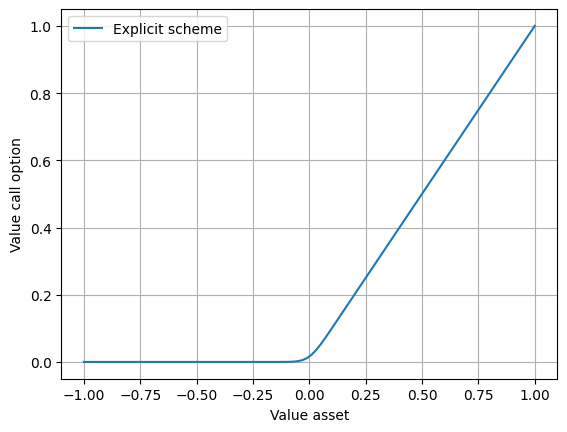

In [204]:
u, xt, gamma = explicit_sheme_azian_option(S, M, N, T, t, r, sigma)
vt = np.linspace(0,0,M)
# for i in range(0, M):
    # vt[i] =  u.iloc[0, i] * st[i]
plt.plot(xt, u.iloc[0], label='Explicit scheme')
# plt.plot(xt, a.iloc[0], label='Analytical')
plt.xlabel("Value asset")
plt.ylabel("Value call option")
plt.grid()
plt.legend()
plt.show()

In [168]:
 gamma[M-1][0] - K * np.exp(-r * T) / S

0.024182085485005667

In [195]:
u.iloc[995:1000, 45:55]

-0.090909     -0.070707     -0.050505     -0.030303     -0.010101  \
0.995996        0.0  1.972527e-23  2.706940e-18  2.726368e-13  3.298786e-08   
0.996997        0.0  0.000000e+00  6.041724e-19  1.222221e-13  2.256545e-08   
0.997998        0.0  0.000000e+00  0.000000e+00  3.646836e-14  1.367436e-08   
0.998999        0.0  0.000000e+00  0.000000e+00  0.000000e+00  6.193062e-09   
1.000000        0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

           0.010101   0.030303   0.050505   0.070707   0.090909  
0.995996   0.010101   0.030303   0.050505   0.070707   0.090909  
0.996997   0.010101   0.030303   0.050505   0.070707   0.090909  
0.997998   0.010101   0.030303   0.050505   0.070707   0.090909  
0.998999   0.010101   0.030303   0.050505   0.070707   0.090909  
1.000000   0.010101   0.030303   0.050505   0.070707   0.090909

In [192]:
u

-1.000000     -0.979798     -0.959596     -0.939394     -0.919192  \
0.000000        0.0 -2.130001e-27  9.324180e-27 -3.900006e-26  1.635973e-25   
0.001001        0.0 -1.857732e-27  8.148359e-27 -3.415649e-26  1.435969e-25   
0.002002        0.0 -1.620186e-27  7.120480e-27 -2.991309e-26  1.260359e-25   
0.003003        0.0 -1.412946e-27  6.221969e-27 -2.619566e-26  1.106176e-25   
0.004004        0.0 -1.232154e-27  5.436581e-27 -2.293915e-26  9.708102e-26   
...             ...           ...           ...           ...           ...   
0.995996        0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
0.996997        0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
0.997998        0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
0.998999        0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1.000000        0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

             -0.898990     -0.878788     -0.858586     -0.838384  \
0.000000 -6.898057e-25  2.923317e-24 -1.244873e-23  5.325562e-23   
0.001001 -6.068211e-25  2.577380e-24 -1.100018e-23  4.716462e-23   
0.002002 -5.337963e-25  2.272283e-24 -9.719779e-24  4.176857e-23   
0.003003 -4.695385e-25  2.003215e-24 -8.588054e-24  3.698835e-23   
0.004004 -4.129978e-25  1.765932e-24 -7.587782e-24  3.275386e-23   
...                ...           ...           ...           ...   
0.995996  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
0.996997  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
0.997998  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
0.998999  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

             -0.818182  ...   0.818182   0.838384   0.858586   0.878788  \
0.000000 -2.288131e-22  ...   0.818182   0.838384   0.858586   0.878788   
0.001001 -2.031009e-22  ...   0.818182   0.838384   0.858586   0.878788   
0.002002 -1.802709e-22  ...   0.818182   0.838384   0.858586   0.878788   
0.003003 -1.600007e-22  ...   0.818182   0.838384   0.858586   0.878788   
0.004004 -1.420041e-22  ...   0.818182   0.838384   0.858586   0.878788   
...                ...  ...        ...        ...        ...        ...   
0.995996  0.000000e+00  ...   0.818182   0.838384   0.858586   0.878788   
0.996997  0.000000e+00  ...   0.818182   0.838384   0.858586   0.878788   
0.997998  0.000000e+00  ...   0.818182   0.838384   0.858586   0.878788   
0.998999  0.000000e+00  ...   0.818182   0.838384   0.858586   0.878788   
1.000000  0.000000e+00  ...   0.818182   0.838384   0.858586   0.878788   

           0.898990   0.919192   0.939394   0.959596   0.979798   1.000000  
0.000000    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  
0.001001    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  
0.002002    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  
0.003003    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  
0.004004    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  
...             ...        ...        ...        ...        ...        ...  
0.995996    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  
0.996997    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  
0.997998    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  
0.998999    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  
1.000000    0.89899   0.919192   0.939394   0.959596   0.979798        1.0  

[1000 rows x 100 columns]

In [149]:
def Krank_Nikolson_scheme(S, K, M, N, T, t, r, sigma, B):
    tau, dt = np.linspace(sigma ** 2 * T / 2, t, N, retstep=True)
    xt, dx = np.linspace(np.log(S / 4 / K), np.log(B / K), M, retstep=True)
    dt = abs(dt)
    a = pd.DataFrame(np.zeros((N, M)),columns=xt, index = tau)
    D = 2 * r / (sigma ** 2)
    for i in range(0, M):
        if (1 - np.exp( - xt[i])) > 0:
            a.iloc[N-1][i] = 1 - np.exp( - xt[i])

    sig = sigma ** 2 
    gamma = - dt * sig /2 / dx ** 2  +  dt / 4 / dx * (sig + D)
    alpha = dt / dx ** 2 * sig + 1
    beta =  - (dt * sig /2 / dx ** 2  +  dt / 4 / dx * (sig + D))
    for j in range(0, N-1):
        b = np.linspace(0,0, M)
        for i in range(1,M - 1):
            b[i] = a.iloc[N-j-1, i] + 1 / 2 / dx ** 2 * dt * sig * (a.iloc[N-j-1, i - 1] - 2 * a.iloc[N-j-1, i] + a.iloc[N-j-1, i + 1]) + 1 / 4 / dx * dt * (sig + D) * ( - a.iloc[N-j-1, i - 1] + a.iloc[N-j-1, i + 1])
        b[1] = a.iloc[N - j - 1, 1] - gamma * a.iloc[N - j - 2, 0] 
        b[M-2] = a.iloc[N - j - 1, M-2] - beta * a.iloc[N -j - 2, M-1]


        A = np.linspace(0,0, M)
        B = np.linspace(0,0, M)
        A[2] = - beta / alpha
        B[2] = b[1] / alpha
        for i in range(2, M-2):
            A[i+1] = - beta / (gamma * A[i] + alpha)
            B[i+1] = (b[i] - gamma * B[i]) / (gamma * A[i] + alpha)

        a.iloc[N - j - 2, M-2] = - (B[M-2] - b[M-2] / gamma) / (A[M-2] + alpha / gamma)
        for i in range(M-3, 0, -1):
            a.iloc[N-j - 2, i] = A[i+1] * a.iloc[N-j-2, i + 1] + B[i+1]
    return a, xt, dx, dt

In [150]:
M = 1000
N = 1000
u, xt, dx, dt = Krank_Nikolson_scheme(S, K, M, N, T, t, r, sigma, B)
vt = np.linspace(0, 0, len(u.iloc[0]))
vt10 = np.linspace(0, 0, len(u.iloc[0]))
vt100 = np.linspace(0, 0, len(u.iloc[0]))
vt500 = np.linspace(0, 0, len(u.iloc[0]))
vt750 = np.linspace(0, 0, len(u.iloc[0]))
vt900 = np.linspace(0, 0, len(u.iloc[0]))
st = np.linspace(0, 0, len(u.iloc[0]))
for i in range(0, len(u.iloc[0])):
    vt[i] = K * np.exp(xt[i]) * u.iloc[0, i]
    vt10[i] = K * np.exp(xt[i]) * u.iloc[10, i]
    vt100[i] = K * np.exp(xt[i]) * u.iloc[100, i]
    vt500[i] = K * np.exp(xt[i]) * u.iloc[500, i]
    vt750[i] = K * np.exp(xt[i]) * u.iloc[750, i]
    vt900[i] = K * np.exp(xt[i]) * u.iloc[900, i]
    st[i] = K * np.exp(xt[i])

# c = [value_call_option_BSM(st[i], K, r, sigma, T, t) for i in range(len(xt))]
# print('Relative error =', (vt[int(np.round(2 * M / 3))] - c[int(np.round(2 * M / 3))])/c[int(np.round(2 * M / 3))])
# print('Analytical error =', dx ** 2 + dt ** 2)
plt.plot(st, vt, label='0 moment')
plt.plot(st, vt10, label='10 moment')
plt.plot(st, vt100, label='100 moment')
plt.plot(st, vt500, label='500 moment')
plt.plot(st, vt750, label='750 moment')
plt.plot(st, vt900, label='900 moment')
# plt.plot(st, c, label='BSM')
plt.xlabel("Value asset")
plt.ylabel("Value call option")
plt.grid()
plt.legend()
plt.show()

ValueError: Index data must be 1-dimensional

In [185]:
def Krank_Nikolson_scheme(S, K, M, N, T, t, r, sigma, Bar):
    tau, dt = np.linspace(0, T, N, retstep=True)
    dt = abs(dt)
    xt, dx = np.linspace(0, Bar, M, retstep=True)
    a = pd.DataFrame(np.zeros((N, M)),columns=xt, index = tau)
    for i in range(0, M):
        if (xt[i] - K) > 0:
            a.iloc[N-1][i] = xt[i] - K

    gamma = np.linspace(0,0,M)
    alpha = np.linspace(0,0,M)
    beta = np.linspace(0,0,M)
    for i in range(0, M):
        gamma[i] = (- dt * r * xt[i]) / (4 * dx) + (dt * sigma ** 2 * xt[i] ** 2) / (4 * dx ** 2)
        alpha[i] = (1 - dt * r / 2) - (dt * sigma ** 2 * xt[i] ** 2) / (2 * dx ** 2)
        beta[i] =  (dt * r * xt[i]) / (4 * dx) + (dt * sigma ** 2 * xt[i] ** 2) / (4 * dx ** 2)
        
    for j in range(0, N-1):
        b = np.linspace(0,0, M)
        for i in range(1,M - 1):
            b[i] = (1 + dt *r / 2) * a.iloc[N-j-1, i] - 1 / 4 / dx ** 2 * dt * sigma ** 2 * xt[i] ** 2 * (a.iloc[N-j-1, i - 1] - 2 * a.iloc[N-j-1, i] + a.iloc[N-j-1, i + 1]) - 1 / 4 / dx * dt * r * xt[i] * ( - a.iloc[N-j-1, i - 1] + a.iloc[N-j-1, i + 1])
        b[1] = a.iloc[N - j - 1, 1] - gamma[1] * a.iloc[N - j - 2, 0] 
        b[M-2] = a.iloc[N - j - 1, M-2] - beta[M-2] * a.iloc[N -j - 2, M-1]


        A = np.linspace(0,0, M)
        B = np.linspace(0,0, M)
        A[2] = - beta[1] / alpha[1]
        B[2] = b[1] / alpha[1]
        for i in range(2, M-2):
            A[i+1] = - beta[i] / (gamma[i] * A[i] + alpha[i])
            B[i+1] = (b[i] - gamma[i] * B[i]) / (gamma[i] * A[i] + alpha[i])

        a.iloc[N - j - 2, M-2] = - (B[M-2] - b[M-2] / gamma[M-2]) / (A[M-2] + alpha[M-2] / gamma[M-2])
        for i in range(M-3, 0, -1):
            a.iloc[N-j - 2, i] = A[i+1] * a.iloc[N-j-2, i + 1] + B[i+1]
    return a, xt, dx, dt

In [212]:
    tau, dt = np.linspace(0, T, N, retstep=True)
    dt = abs(dt)
    xt, dx = np.linspace(0, Bar, M, retstep=True)
    a = pd.DataFrame(np.zeros((N, M)),columns=xt, index = tau)
    for i in range(0, M):
        if (xt[i] - K) > 0:
            a.iloc[N-1][i] = xt[i] - K

#     gamma = np.linspace(0,0,M)
#     alpha = np.linspace(0,0,M)
#     beta = np.linspace(0,0,M)
#     for i in range(0, M):
#         gamma[i] = (- dt * r * xt[i]) / (4 * dx) + (dt * sigma ** 2 * xt[i] ** 2) / (4 * dx ** 2)
#         alpha[i] = (1 - dt * r / 2) - (dt * sigma ** 2 * xt[i] ** 2) / (2 * dx ** 2)
#         beta[i] =  (dt * r * xt[i]) / (4 * dx) + (dt * sigma ** 2 * xt[i] ** 2) / (4 * dx ** 2)
#     j = 0    
#     b = np.linspace(0,0, M)
#     for i in range(1,M - 1):
#         b[i] = (1 + dt *r / 2) * a.iloc[N-j-1, i] - 1 / 4 / dx ** 2 * dt * sigma ** 2 * xt[i] ** 2 * (a.iloc[N-j-1, i - 1] - 2 * a.iloc[N-j-1, i] + a.iloc[N-j-1, i + 1]) - 1 / 4 / dx * dt * r * xt[i] * ( - a.iloc[N-j-1, i - 1] + a.iloc[N-j-1, i + 1])
#     b[1] = a.iloc[N - j - 1, 1] - gamma[1] * a.iloc[N - j - 2, 0] 
#     b[M-2] = a.iloc[N - j - 1, M-2] - beta[M-2] * a.iloc[N -j - 2, M-1]


#     A = np.linspace(0,0, M)
#     B = np.linspace(0,0, M)
#     A[2] = - beta[1] / alpha[1]
#     B[2] = b[1] / alpha[1]
#     for i in range(2, M-2):
#         A[i+1] = - beta[i] / (gamma[i] * A[i] + alpha[i])
#         B[i+1] = (b[i] - gamma[i] * B[i]) / (gamma[i] * A[i] + alpha[i])

#     a.iloc[N - j - 2, M-2] = - (B[M-2] - b[M-2] / gamma[M-2]) / (A[M-2] + alpha[M-2] / gamma[M-2])
#     for i in range(M-3, 0, -1):
#         a.iloc[N-j - 2, i] = A[i+1] * a.iloc[N-j-2, i + 1] + B[i+1]

C:\Users\Samunr1s\AppData\Local\Temp\ipykernel_9252\283630020.py:7: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Index is deprecated. In a future version, `series[an_int] = val` will insert a new key into the Series. Use `series.iloc[an_int] = val` to treat the key as positional.
  a.iloc[N-1][i] = xt[i] - K


In [196]:
print(- (B[M-2] - b[M-2] / gamma[M-2]) / (A[M-2] + alpha[M-2] / gamma[M-2]))

100.75903095925763
